# Nama    : Yoga Lafrianto
# Project : Bank Marketing Campaign

#Import Data

In [ ]:
#Import original data from gdrive
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Pelatihan Data Science Purwadhika/data_bank_marketing_campaign.csv'
original_data = pd.read_csv(file_path)
original_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


# Business Problem Understanding

Jenis-jenis produk keuangan yang digunakan oleh masyarakat semakin bervariasi. Salah satu produk keuangan yang dikenal luas oleh masyarakat adalah deposito berjangka. Mekanisme dari deposito berjangka adalah nasabah menyetor sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya dapat ditarik setelah jangka waktu tertentu. Sebagai kompensasi, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetorkan.


Meskipun demikian, sebagai entitas bisnis dengan produk keuangan dan nasabah masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan nasabah baru adalah dengan melakukan kampanye pemasaran.

## Problome Statement

- ***Memprediksi Keberhasilan Kampanye Pemasaran untuk Deposito Berjangka***: "Bagaimana cara memprediksi apakah nasabah akan melakukan deposito berjangka setelah dihubungi dalam kampanye pemasaran menggunakan profil nasabah dan data kampanye?"
  - Berfokus kepada klasifikasi nasabah akan melakukan deposito atau tidak (kolom deposit sebagai target).
  - Fitur yang digunakan mencakup profil nasabah (umur, pekerjaan, saldo, kepemilikan rumah, pinjaman) dan detail kampanye (jumlah kontak, pdays, outcome kampanye sebelumnya, dll.).

- ***Identifikasi Faktor-Faktor yang Memengaruhi Keputusan Nasabah untuk Melakukan Deposito Berjangka:*** "Faktor apa saja yang paling memengaruhi keputusan nasabah untuk melakukan deposito berjangka dalam kampanye pemasaran bank?"
  - Tujuan ini akan fokus pada interpretasi model dan pengambilan insight dari fitur-fitur seperti usia, jenis pekerjaan, saldo, dan interaksi dari kampanye sebelumnya.
  - Menggunakan model seperti feature importance untuk memahami faktor paling signifikan yang mempengaruhi keputusan nasabah.

- ***Optimalisasi Kampanye Pemasaran Bank untuk Meningkatkan Tingkat Deposito Berjangka:*** "Bagaimana cara mengoptimalkan kampanye pemasaran bank agar lebih efektif dalam meningkatkan jumlah nasabah yang melakukan deposito berjangka?"
  - Fokus pada analisis strategi pemasaran, misalnya dengan melihat berapa kali nasabah dihubungi (kolom campaign), dan bagaimana hasil dari kampanye sebelumnya memengaruhi keputusan deposito.
  - Tujuan ini dapat membantu mengoptimalkan jumlah kontak dan strategi yang lebih efektif untuk meningkatkan hasil kampanye.

- ***Analisis Peluang Peningkatan Pendapatan melalui Deposito Berjangka dari Kampanye Pemasaran:*** "Bagaimana bank dapat memaksimalkan pendapatan dari deposito berjangka dengan memperbaiki efektivitas kampanye pemasaran berdasarkan perilaku dan profil nasabah?"
  - Selain fokus pada klasifikasi, kita juga bisa memperkirakan dampak peningkatan hasil kampanye pada pendapatan bank dari deposito berjangka.
  - Model ini bisa digunakan untuk memprediksi potensi pendapatan berdasarkan profil nasabah yang memiliki kecenderungan melakukan deposito.

## Matric Evaluation

***Type 1 Error (False Positive):***

- Definisi: Ketika model memprediksi bahwa nasabah akan melakukan deposito (yes), padahal sebenarnya nasabah tidak melakukan deposito (no).
- Konsekuensi:
  - Sia-sianya biaya kampanye pemasaran: Bank mengalokasikan sumber daya, waktu, dan biaya untuk menghubungi nasabah yang diprediksi akan melakukan deposito, padahal nasabah tersebut tidak tertarik. Ini mengakibatkan pemborosan biaya pemasaran dan sumber daya.
  - Estimasi kerugian: Bank bisa menghitung berapa biaya rata-rata untuk setiap kontak atau upaya pemasaran yang dilakukan pada nasabah. Jumlah nasabah yang tidak melakukan deposito (False Positive) dikalikan dengan biaya pemasaran untuk memberikan estimasi kerugian.

- Contoh Kerugian: Jika biaya menghubungi satu nasabah adalah 10(dollar), dan ada 100 nasabah yang diprediksi akan melakukan deposito tetapi tidak (False Positive), maka kerugian total adalah 10(dollar) x 100 = 1,000(dollar).



***Type 2 Error (False Negative):***

- Definisi: Ketika model memprediksi bahwa nasabah tidak akan melakukan deposito (no), padahal sebenarnya nasabah tersebut bersedia untuk melakukan deposito (yes).
- Konsekuensi:
  - Kehilangan peluang pendapatan dari nasabah potensial: Bank kehilangan kesempatan untuk mendapatkan deposito dari nasabah yang sebenarnya bersedia, tetapi terlewatkan oleh prediksi model. Ini mengakibatkan hilangnya peluang pendapatan bunga dari deposito yang gagal diperoleh.
  - Estimasi kerugian: Bank bisa menghitung rata-rata keuntungan yang diperoleh dari satu deposito, lalu mengalikan dengan jumlah nasabah yang terlewat (False Negative). Ini akan memberikan estimasi potensi pendapatan yang hilang.

- Contoh Kerugian: Jika rata-rata keuntungan dari satu deposito adalah 200(dolar) per nasabah, dan ada 50 nasabah yang sebenarnya ingin melakukan deposito tetapi terlewatkan (False Negative), maka potensi pendapatan yang hilang adalah 200(dollar) x 50 = 10,000(dollar).

###Alasan

- Kehilangan peluang pendapatan: Jika nasabah yang sebenarnya bersedia melakukan deposito terlewatkan (False Negative), bank kehilangan potensi pendapatan bunga dari deposito tersebut. Dalam dunia bisnis, kehilangan pendapatan sering kali lebih berbahaya daripada pemborosan biaya pemasaran, karena pendapatan yang hilang tidak bisa dipulihkan.
- Peluang tidak tergantikan: Peluang untuk mengamankan nasabah yang bersedia melakukan deposito bisa jadi kesempatan yang sulit didapatkan kembali. Kehilangan peluang tersebut berarti kehilangan pemasukan jangka panjang.
- Disini kita telah menentukan bahwa kerugian yang paling besar terdapat pada `false negative`oleh sebabitu disini menggunakan `recall score` karena kita ingin berfokus pada Type 2 Error (False Negative) sesuai dengan kondisi yang ada. Karena kita sebagai bank lebih khawatir kehilangan peluang pendapatan dari nasabah yang terlewatkan sehingga dengan menggunakan matric evaluation `recall` memastikan bahwa sebanyak mungkin nasabah potensial teridentifikasi dengan benar, sehingga meminimalkan jumlah False Negatives.
- Pendukung : [link pendukung](https://www.altexsoft.com/blog/machine-learning-metrics/)

#Data Understanding

##Dictionary

***Profil Nasabah:***

- age (usia): Usia nasabah.
- job (pekerjaan): Jenis pekerjaan nasabah.
- balance (saldo): Saldo di rekening nasabah.
- housing (kepemilikan rumah): Apakah nasabah memiliki rumah atau tidak.
- loan (pinjaman): Apakah nasabah memiliki pinjaman atau tidak.

***Data Pemasaran:***

- contact (kontak): Jenis komunikasi kontak yang digunakan.
- month (bulan): Bulan terakhir nasabah dihubungi dalam satu tahun.
- campaign (kampanye): Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah tersebut.
- pdays (jumlah hari sejak kontak terakhir): Jumlah hari sejak nasabah dihubungi dari kampanye sebelumnya.
- poutcome (hasil kampanye sebelumnya): Hasil dari kampanye pemasaran sebelumnya.
- deposit (deposito): Apakah nasabah melakukan deposito atau tidak.

***`Dengan nilai pdays (-) maka nasabah belum pernah dihubungi sebelumnya `***

## Data Profiling

In [ ]:
#Menampilkan info data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [ ]:
# mencari data unique pada setiap kolom yang ada
list_item = []
for col in original_data.columns:
    list_item.append([col, original_data[col].nunique(), original_data[col].unique()])

# display table descriptions
table_desc = pd.DataFrame(list_item, columns=['column_name', 'number_of_unique', 'unique_value'])
table_desc


,column_name,number_of_unique,unique_value
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,12,"[admin., self-employed, services, housemaid, t..."
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,4,"[unknown, other, failure, success]"


In [ ]:
#Untuk memunculkan data yang duplikat
original_data[original_data.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Dapat dilihat terdapat 8 point duplikat yang didapatkan dalam dataset, namun setelah dilakukan analisis dalam data ini, ***`TIDAK MENGHAPUS DATA DUPLIKASI `*** dikarenakan data tersebut tidak memiliki index ID yang sama, dan sangat memungkinkan sekali apa bila masing-masing feature memiliki data yang sama karena merupakan data promosi campaign dan tidak memiliki ID unik

## Missing Values

In [ ]:
# Memeriksa setiap kolom dalam DataFrame apakah terdapat nilai NaN atau NaT sudah tidak ada
#Dibuat dataframe untuk yang terdapat nilai NaN

#Mencari jumlah baris data
total_baris_data = len(original_data)

# Membuat DataFrame kosong untuk menyimpan hasil
missing = pd.DataFrame({'Jumlah':original_data.isnull().sum().sort_values(ascending=False)})

#Menambahkan jumlah persen kedalam dataframe
missing['Persentase']= round((missing['Jumlah']/total_baris_data)*100,2)
missing

,Jumlah,Persentase
age,0,0.0
job,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
campaign,0,0.0
pdays,0,0.0
poutcome,0,0.0


<Axes: >

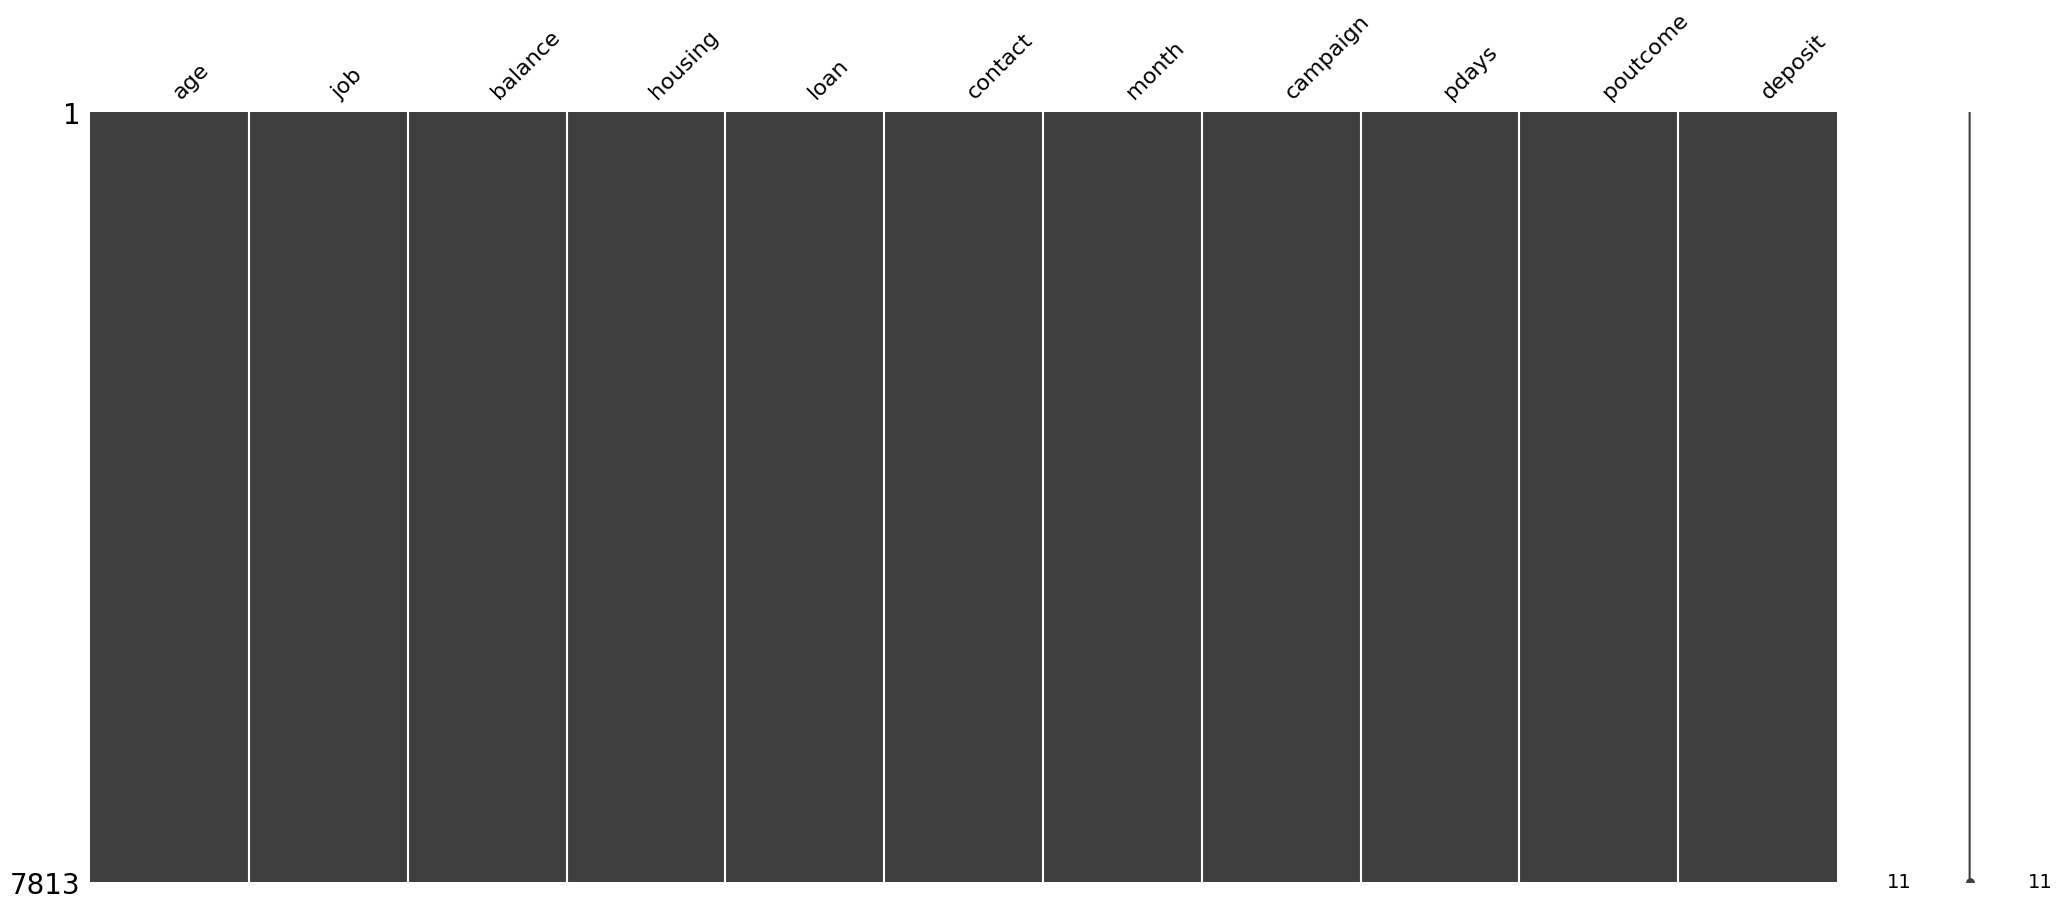

In [ ]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(original_data)

Selanjutnya setelah tidak ada data NaN atau NaT, bisa dilanjutkan kepada tahap selanjutnya yaitu melakukan pengecekan terhadap distribusi data yang ada pada data data_bank_marketing_campaign ini.

## Variable Numerik

### Statistika Deskriptif

In [ ]:
# Statistik deskriptif untuk kolom numerik
original_data.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


### Distribusi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

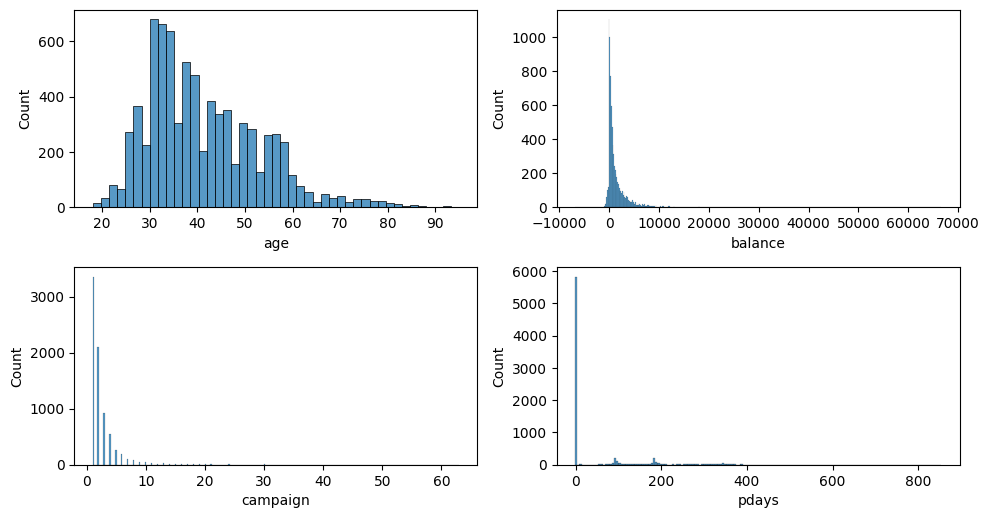

In [ ]:
numerik = original_data.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.histplot(original_data[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Dapat dilihat dari tgrafik bahwa distribusi data yang ada pada kolom numerik ini tidak normal

***Age (Usia)***
- Distribusi usia terlihat berbentuk seperti lonceng tetapi cenderung miring ke kanan.
- Kebanyakan orang dalam dataset ini berada di rentang usia 30 hingga 50 tahun, dengan jumlah yang lebih sedikit di kelompok usia lebih muda dan lebih tua.
- Ada penurunan bertahap setelah usia 50 tahun, menunjukkan bahwa kelompok usia yang lebih tua memiliki lebih sedikit data.
- Distribusi ini tidak sepenuhnya normal karena terlihat miring ke kanan (right-skewed), meskipun hampir mendekati distribusi normal.

***Balance (Saldo)***
- Distribusi saldo (balance) sangat miring ke kanan (right-skewed).
- Sebagian besar nasabah memiliki saldo yang relatif rendah, dengan sebagian besar nilai saldo mendekati 0.
- Ada outlier yang signifikan dengan saldo yang sangat besar, mencapai lebih dari 60.000. Beberapa saldo negatif juga terlihat (kemungkinan nasabah dengan hutang).
- Distribusi ini tidak normal, sangat skewed ke kanan. Ini menunjukkan bahwa sebagian besar orang memiliki saldo yang kecil, sedangkan sebagian kecil memiliki saldo yang sangat besar (outliers).

***Campaign (Jumlah Kontak Kampanye)***
- Distribusi jumlah kontak kampanye menunjukkan long tail dengan sebagian besar nilai mendekati 0.
- Mayoritas nasabah hanya dihubungi beberapa kali dalam kampanye pemasaran ini, dengan kebanyakan dihubungi kurang dari 5 kali.
- Ada sedikit nasabah yang dihubungi lebih dari 10 kali, yang menunjukkan adanya long tail (ekor panjang).
- Distribusi ini tidak normal, sangat miring ke kanan (right-skewed). Sebagian besar nilai terkonsentrasi di awal rentang distribusi (sekitar 1-3 kali dihubungi), dan ada outliers yang dihubungi jauh lebih sering.

***Pdays (Hari Sejak Nasabah Dihubungi dari Kampanye Sebelumnya)***
- Distribusi pdays juga menunjukkan long tail, dengan sebagian besar nasabah yang tidak dihubungi dalam waktu dekat.
- Sebagian besar nasabah tidak dihubungi dalam beberapa waktu terakhir, dengan nilai 0 yang mendominasi distribusi.
- Sebagian kecil nasabah memiliki pdays yang lebih tinggi, hingga lebih dari 800 hari sejak mereka dihubungi terakhir kali.
- Distribusi ini tidak normal, sangat right-skewed dengan banyak nilai 0 dan sedikit nilai yang lebih tinggi.

***Kesimpulan Keseluruhan Features Grafik***
- Semua variabel di atas tidak memiliki distribusi normal. Sebagian besar dari mereka memiliki skewness yang signifikan ke arah kanan (right-skewed), yang berarti distribusi data tidak merata, dengan sebagian besar data terkonsentrasi pada nilai-nilai rendah, sementara nilai-nilai yang tinggi merupakan outliers.
- Hal ini sering terjadi dalam data finansial atau pemasaran di mana ada sedikit nasabah yang memberikan kontribusi besar (misalnya, saldo besar atau kontak yang sering), sementara sebagian besar nasabah memiliki kontribusi kecil.


### Uji Statistika

Pada pengujian ini kita menggunakannakan 4 metode yaitu Kolmogorov-Smirnov (K-S) Test, Shapiro-Wilk Test, Lilliefors Test, D'Agostino-Pearson Test.

#### Kolmogorov-Smirnov (K-S) Test

In [ ]:
from scipy.stats import kstest

In [ ]:
# List untuk menyimpan hasil
hasil_ks_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = kstest(original_data[kolom], 'norm')

    # Menyimpan hasil untuk setiap kolom
    hasil_ks_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })


# Mengonversi hasil menjadi DataFrame
hasil_ks_test = pd.DataFrame(hasil_ks_test)

# Menampilkan DataFrame hasil
hasil_ks_test



,Kolom,Statistic,p-value,Normalitas
0,age,1.000000,0.0,Tidak Normal
1,balance,0.861315,0.0,Tidak Normal
2,campaign,0.841345,0.0,Tidak Normal
3,pdays,0.585873,0.0,Tidak Normal


#### Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro

In [ ]:
# List untuk menyimpan hasil
hasil_sw_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = shapiro(original_data[kolom])

    # Menyimpan hasil untuk setiap kolom
    hasil_sw_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_sw_test = pd.DataFrame(hasil_sw_test)

# Menampilkan DataFrame hasil
hasil_sw_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7813.
  res = hypotest_fun_out(*samples, **kwds)


,Kolom,Statistic,p-value,Normalitas
0,age,0.946912,1.970211e-46,Tidak Normal
1,balance,0.491062,1.205934e-91,Tidak Normal
2,campaign,0.543019,3.891218e-89,Tidak Normal
3,pdays,0.559834,2.852118e-88,Tidak Normal


#### Lilliefors Test

In [ ]:
#!pip install statsmodels
from statsmodels.stats.diagnostic import lilliefors # import lilliefors from statsmodels.stats.diagnostic


In [ ]:

# List untuk menyimpan hasil
hasil_lf_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = lilliefors(original_data[kolom])

    # Menyimpan hasil untuk setiap kolom
    hasil_lf_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_lf_test = pd.DataFrame(hasil_lf_test)

# Menampilkan DataFrame hasil
hasil_lf_test

,Kolom,Statistic,p-value,Normalitas
0,age,0.103388,0.001,Tidak Normal
1,balance,0.256794,0.001,Tidak Normal
2,campaign,0.288659,0.001,Tidak Normal
3,pdays,0.430668,0.001,Tidak Normal


#### D'Agostino-Pearson Test

In [ ]:
from scipy.stats import normaltest

In [ ]:
# List untuk menyimpan hasil
hasil_dp_test = []

# Looping untuk setiap kolom numerik
for kolom in numerik.columns:
    stat, pval = normaltest(original_data[kolom])

    # Menyimpan hasil untuk setiap kolom
    hasil_dp_test.append({
        'Kolom': kolom,
        'Statistic': stat,
        'p-value': pval,
        'Normalitas': 'Tidak Normal' if pval < 0.05 else 'Normal'
    })

# Mengonversi hasil menjadi DataFrame
hasil_dp_test = pd.DataFrame(hasil_dp_test)

# Menampilkan DataFrame hasil
hasil_dp_test

,Kolom,Statistic,p-value,Normalitas
0,age,820.493315,6.794232e-179,Tidak Normal
1,balance,9811.597925,0.000000e+00,Tidak Normal
2,campaign,8680.583811,0.000000e+00,Tidak Normal
3,pdays,3884.471470,0.000000e+00,Tidak Normal


### Outlier

#### Visual by boxplot

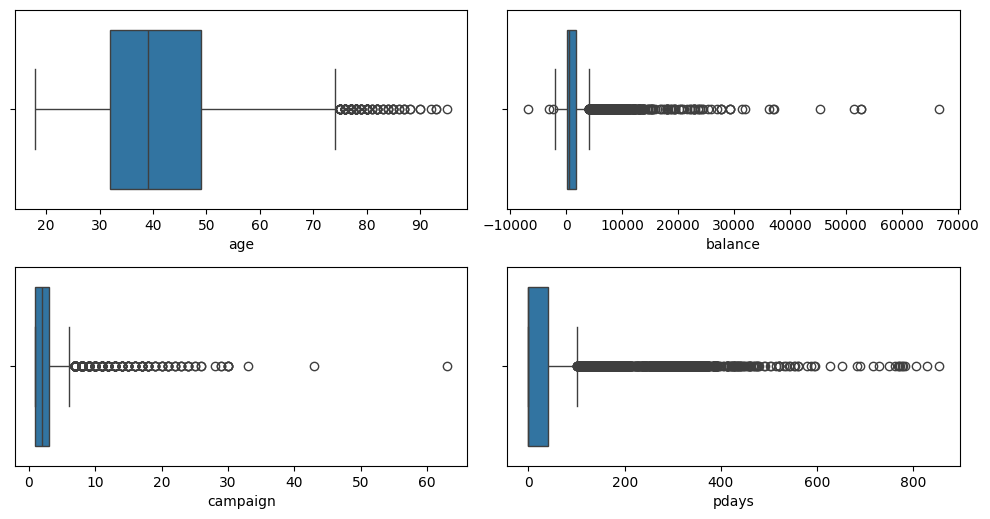

In [ ]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = original_data[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

***Age:***

- Usia sebagian besar nasabah berada dalam rentang sekitar 30 hingga 50 tahun, dengan median di sekitar 38-40 tahun.
- Ada beberapa outlier, yakni nasabah dengan usia di atas 70 tahun, bahkan mendekati 90 tahun. Hal ini menunjukkan bahwa sebagian kecil nasabah berada di luar rentang umum.

***Balance:***

- Distribusi saldo nasabah sangat tidak merata, dengan banyak outlier, baik dalam jumlah saldo yang sangat tinggi (hingga 60.000) maupun saldo negatif.
- Mayoritas nasabah memiliki saldo yang lebih rendah dari 10.000, dan median saldo tampaknya mendekati 0.
- Nilai negatif pada saldo menunjukkan nasabah yang mungkin memiliki hutang atau pinjaman.

***Campaign:***

- Sebagian besar nasabah hanya dihubungi kurang dari 10 kali selama kampanye, dengan median di sekitar 2 kontak.
- Terdapat outlier yang sangat signifikan, menunjukkan beberapa nasabah dihubungi hingga lebih dari 40-60 kali, yang menandakan kemungkinan adanya penargetan intensif pada beberapa individu.

***Pdays:***

- Sebagian besar nilai pdays (jumlah hari sejak kampanye sebelumnya) terletak pada angka -1, yang artinya mayoritas nasabah belum dihubungi pada kampanye sebelumnya.
- Namun, ada beberapa nasabah yang memiliki nilai pdays hingga lebih dari 500, yang menunjukkan bahwa beberapa nasabah sudah dihubungi sebelumnya dalam kampanye yang lebih lama.

***`Kesimpulan:`***

- Outlier ditemukan di semua variabel, khususnya pada balance, campaign, dan pdays, yang mungkin memerlukan penanganan lebih lanjut jika outlier tersebut berpotensi mempengaruhi model machine learning yang akan dibangun.
- Distribusi yang tidak simetris: Terutama pada variabel balance, distribusi sangat condong ke kanan, dengan sebagian besar saldo berada di bawah 10.000, namun ada beberapa nasabah dengan saldo yang sangat tinggi.

####IQR

In [ ]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})


,kolom,jumlah outliers
0,age,121
1,balance,736
2,campaign,429
3,pdays,1454


### Korelasi

####Heatmap

#####Hubungan Monotonik

Selanjutnya unutk mencari hubungan monotonik antar feature lainnya, disini kita menggunakan metode spearman karena telah kita ketahui bahwa distrubusi yang ada pada dataset ini terdistribusi tidak normal

<Axes: >

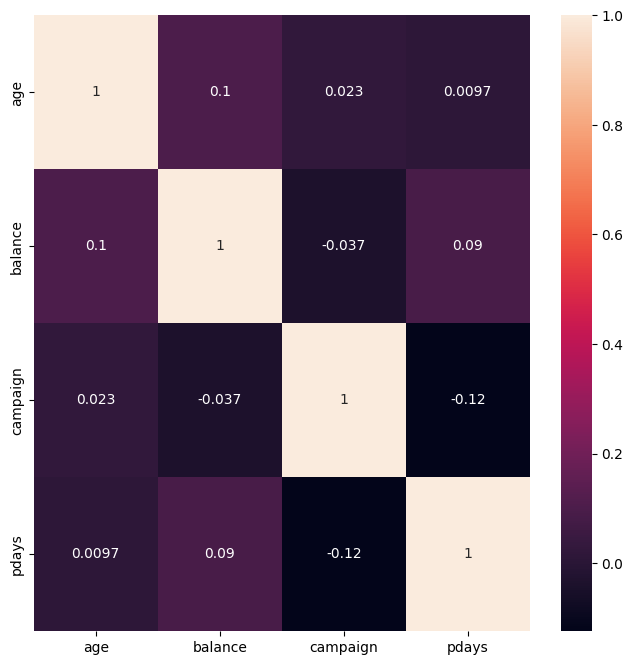

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

***`Age (Usia)`***

- Age vs Balance: Terdapat korelasi positif yang lemah (0.1) antara usia dan saldo nasabah. Ini menunjukkan bahwa ketika usia nasabah bertambah, saldo mereka sedikit cenderung lebih tinggi, tetapi hubungannya sangat lemah.
- Age vs Campaign: Korelasi yang sangat lemah (0.023) antara usia dan jumlah kontak selama kampanye. Ini mengindikasikan bahwa usia tidak banyak mempengaruhi frekuensi nasabah dihubungi dalam kampanye.
- Age vs Pdays: Korelasi yang sangat lemah (0.0097) antara usia dan jumlah hari sejak kampanye terakhir. Tidak ada hubungan yang signifikan antara kedua variabel ini.

***`Balance (Saldo)`***

- Balance vs Campaign: Korelasi negatif yang sangat lemah (-0.037) antara saldo nasabah dan jumlah kontak selama kampanye. Ini mengindikasikan bahwa saldo nasabah tidak memiliki hubungan signifikan dengan jumlah kontak yang dilakukan dalam kampanye.
- Balance vs Pdays: Terdapat korelasi positif yang lemah (0.09) antara saldo dan jumlah hari sejak kampanye terakhir. Nasabah dengan saldo yang lebih tinggi sedikit cenderung memiliki jeda waktu lebih lama sejak kampanye sebelumnya.

***`Campaign (Jumlah Kontak Selama Kampanye)`***

- Campaign vs Pdays: Terdapat korelasi negatif yang lemah (-0.12) antara jumlah kontak selama kampanye dengan jumlah hari sejak kampanye terakhir. Ini mungkin menunjukkan bahwa nasabah yang dihubungi lebih sering selama kampanye cenderung memiliki jeda yang lebih singkat sejak kampanye terakhir.

***Kesimpulan:***

- Tidak ada hubungan yang kuat atau signifikan antara variabel-variabel numerik yang ditampilkan di heatmap ini. Sebagian besar korelasinya sangat lemah (mendekati 0), yang berarti masing-masing variabel numerik seperti age, balance, campaign, dan pdays cenderung tidak mempengaruhi satu sama lain secara signifikan.
- Ini menunjukkan bahwa dalam konteks prediksi deposito nasabah, faktor-faktor non-numerik atau kategori seperti pekerjaan, kepemilikan rumah, atau hasil kampanye sebelumnya mungkin lebih relevan untuk diperhatikan daripada variabel numerik ini.

##### Multikolineartias dengan VIF

Variabel VIF (Variance Inflation Factor) digunakan untuk mengukur tingkat multikolinearitas antara variabel independen dalam model regresi. Semakin tinggi nilai VIF, semakin tinggi korelasi antara variabel tersebut dengan variabel lainnya dalam model, yang menunjukkan potensi masalah multikolinearitas.

######Versi Dataframe

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# buat function
def calc_vif(x):
    # dataframe kosong
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vig untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


In [ ]:
calc_vif(numerik).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,age,2.251170
2,campaign,1.749270
1,balance,1.250455
3,pdays,1.214082


***`Age (VIF = 2.251)`***

- Nilai VIF sebesar 2.25 menunjukkan bahwa variabel age memiliki korelasi yang cukup rendah dengan variabel independen lainnya. Secara umum, nilai VIF di bawah 5 dianggap tidak menunjukkan multikolinearitas yang berarti, sehingga age dapat digunakan dalam model tanpa masalah multikolinearitas yang signifikan.

***`Campaign (VIF = 1.749)`***

- Dengan nilai VIF 1.75, variabel campaign juga menunjukkan multikolinearitas yang sangat rendah dengan variabel lain. Hal ini berarti frekuensi nasabah dihubungi selama kampanye tidak terlalu berkorelasi dengan variabel numerik lainnya.

***`Balance (VIF = 1.250)`***

- Nilai VIF sebesar 1.25 menunjukkan bahwa variabel balance memiliki korelasi yang sangat rendah dengan variabel lain dalam model. Tidak ada indikasi multikolinearitas yang mengkhawatirkan pada variabel ini.

***`Pdays (VIF = 1.214)`***

- Pdays memiliki nilai VIF yang sangat rendah, yaitu 1.21. Ini menunjukkan bahwa jumlah hari sejak kampanye sebelumnya tidak berkorelasi secara signifikan dengan variabel numerik lainnya.

***Kesimpulan***

- Semua variabel yang dianalisis memiliki nilai VIF di bawah 5, yang berarti tidak ada masalah serius dengan multikolinearitas antara variabel independen. Oleh karena itu, semua variabel dapat dimasukkan ke dalam model tanpa khawatir mengenai multikolinearitas yang berlebihan.
- Jika nilai VIF di atas 5, biasanya dianggap sebagai tanda bahwa variabel tersebut sangat berkorelasi dengan variabel lain dan mungkin perlu dipertimbangkan untuk dihapus atau direduksi dari model.

###### Versi Visual

In [ ]:
# Hitung VIF untuk variabel numerik
vif_data = calc_vif(numerik)

<ipython-input-187-7f16a5636a93>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.25117023083236' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vif_matrix.loc[vif_data['variables'][i], vif_data['variables'][i]] = vif_data['VIF'][i]
<ipython-input-187-7f16a5636a93>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.2504551107256128' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vif_matrix.loc[vif_data['variables'][i], vif_data['variables'][i]] = vif_data['VIF'][i]
<ipython-input-187-7f16a5636a93>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.7492697599663494' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vif_matrix.loc[vif_data['variables'][

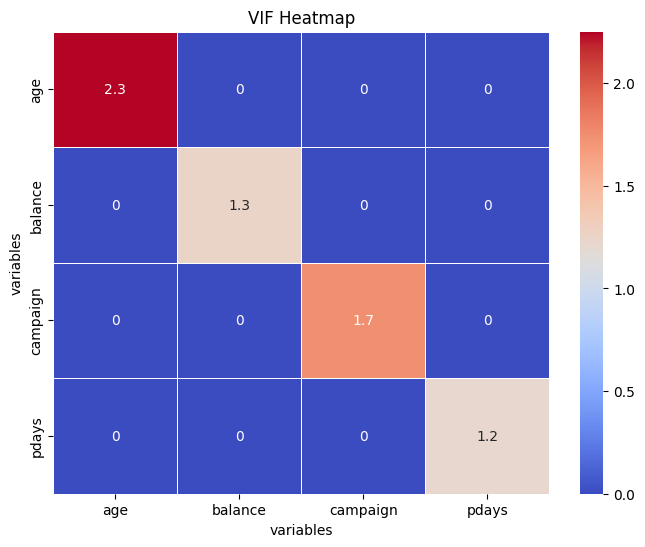

In [ ]:
# Ubah VIF menjadi matriks untuk heatmap (VIF sebagai diagonal utama, 0 di tempat lain)
vif_matrix = pd.DataFrame(0, index=vif_data['variables'], columns=vif_data['variables'])
for i in range(len(vif_data)):
    vif_matrix.loc[vif_data['variables'][i], vif_data['variables'][i]] = vif_data['VIF'][i]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(vif_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('VIF Heatmap')
plt.show()

***Age:***
- VIF: 2.3: Angka VIF ini relatif rendah dan berada dalam ambang batas yang wajar. Artinya, tidak ada multikolinearitas yang signifikan pada variabel age terhadap variabel lain dalam model.

***Balance:***
- VIF: 1.3: Nilai VIF ini menunjukkan bahwa tidak ada masalah multikolinearitas yang berarti pada variabel balance. Artinya, variabel ini cukup independen dari variabel lain.

***Campaign:***
- VIF: 1.7: Sama halnya dengan balance, VIF untuk campaign juga berada di bawah angka yang mengindikasikan multikolinearitas. Ini menunjukkan bahwa variabel campaign tidak terlalu berkorelasi dengan variabel lain.

***Pdays:***
- VIF: 1.2: Ini adalah VIF terendah di antara variabel lainnya, yang mengindikasikan bahwa pdays hampir tidak memiliki multikolinearitas dengan variabel lain di dalam model.

***Kesimpulan***
- Berdasarkan nilai VIF yang disajikan pada heatmap ini, tidak ada masalah serius terkait multikolinearitas antar variabel independen dalam model kita. Semua nilai VIF berada di bawah 5, yang mengindikasikan bahwa tidak ada hubungan kuat antar variabel independen yang akan mengganggu interpretasi model.
- Age memiliki nilai VIF tertinggi (2.3), tetapi masih berada dalam rentang yang dapat diterima dan tidak menunjukkan multikolinearitas yang signifikan.


## Variable Kategorik

### Describe

In [ ]:
original_data.describe(include = 'object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


###Uniq Value

In [ ]:
kategorik = original_data.select_dtypes(include = 'object')
kategorik.nunique()


,0
job,12
housing,2
loan,2
contact,3
month,12
poutcome,4
deposit,2


###Value Count

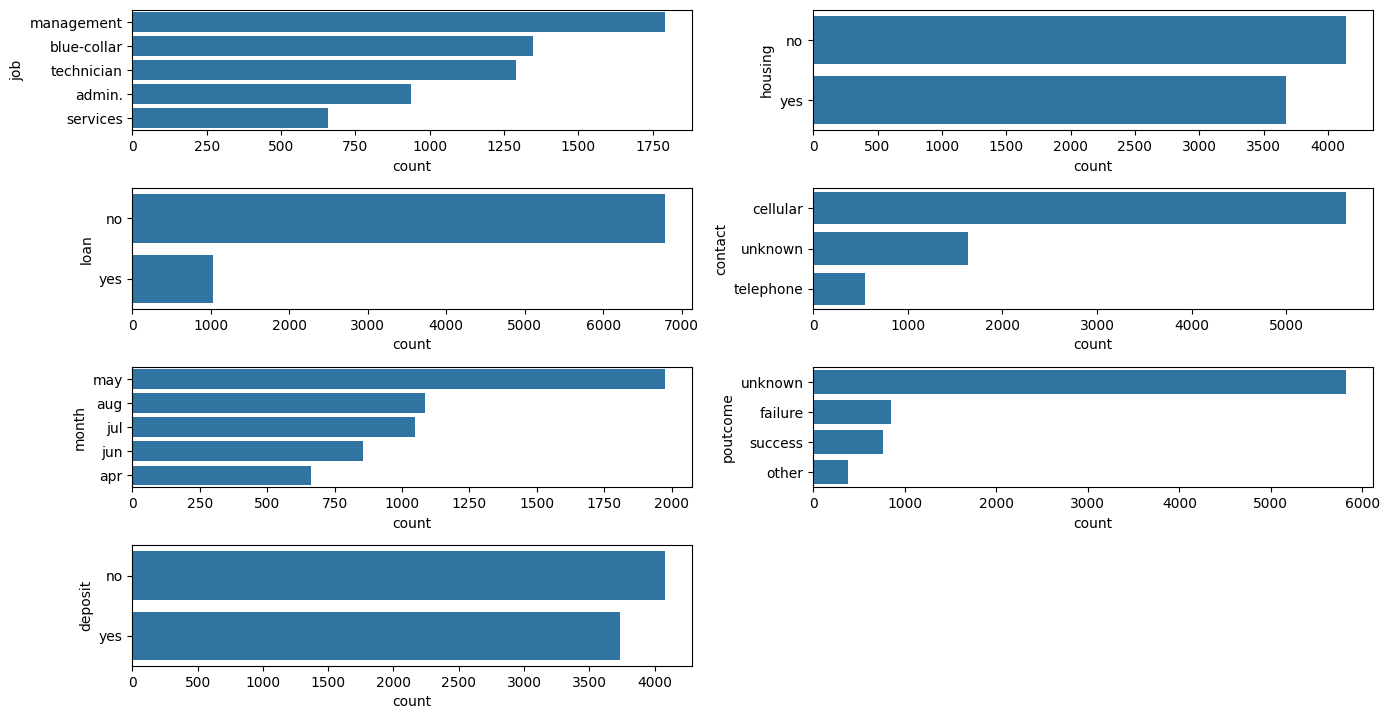

In [ ]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (14,14)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(8,2,posisi)
    sns.barplot(original_data[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

***Job:***
- Distribusi pekerjaan: Mayoritas nasabah yang terlibat dalam kampanye pemasaran memiliki pekerjaan di sektor management, diikuti oleh blue-collar, technician, admin., dan services.
- Pekerjaan nasabah merupakan faktor penting yang dapat mempengaruhi kecenderungan mereka untuk melakukan deposito, karena pekerjaan sering kali berkaitan dengan pendapatan dan stabilitas keuangan.

***Housing:***
- Kepemilikan perumahan: Mayoritas nasabah dalam dataset ini tidak memiliki pinjaman (no). Hal ini dapat berimplikasi bahwa nasabah tanpa pinjaman, dan rata-rata sudah memiliki rumah sehingga mungkin lebih memiliki kapasitas finansial untuk melakukan deposito.

***Loan:***
- Kepemilikan pinjaman pribadi: Sebagian besar nasabah tidak memiliki pinjaman pribadi (no). Nasabah yang tidak memiliki pinjaman pribadi mungkin memiliki lebih banyak dana yang tersedia untuk diinvestasikan dalam deposito.

***Contact:***
- Tipe komunikasi: Mayoritas kontak dilakukan melalui cellular, diikuti oleh unknown (tidak diketahui tipe kontak) dan telephone. Metode kontak dapat mempengaruhi tingkat keberhasilan kampanye, di mana kontak melalui cellular mungkin lebih efektif karena nasabah lebih mudah dihubungi.

***Month:***
- Bulan terakhir kampanye: Bulan May (Mei) merupakan bulan di mana kampanye pemasaran paling aktif dilakukan, diikuti oleh August (Agustus), July (Juli), June (Juni), dan April (April). Hal ini menunjukkan bahwa kampanye lebih intens dilakukan di bulan-bulan tertentu, yang mungkin berkaitan dengan strategi pemasaran tahunan bank.

***Poutcome:***
- Hasil kampanye sebelumnya: Sebagian besar nasabah yang terlibat dalam kampanye tidak memiliki hasil yang diketahui dari kampanye sebelumnya (unknown). Namun, beberapa hasil menunjukkan failure, success, dan other. Nasabah yang pernah sukses di kampanye sebelumnya cenderung lebih mudah dihubungi dan lebih mungkin melakukan deposito.

***Deposit:***
- Hasil deposito: Mayoritas nasabah tidak melakukan deposito (no), sedangkan sejumlah nasabah melakukan deposito (yes). Ini menunjukkan bahwa kampanye pemasaran memiliki tantangan dalam meyakinkan nasabah untuk melakukan deposito.

***Kesimpulan***
- Grafik ini menunjukkan distribusi 5 teratas dari beberapa variabel penting dalam dataset yang berkaitan dengan profil nasabah dan bagaimana mereka dihubungi selama kampanye pemasaran bank. Beberapa variabel seperti pekerjaan, kepemilikan pinjaman, dan hasil kampanye sebelumnya dapat memainkan peran penting dalam menentukan keberhasilan kampanye pemasaran. Selain itu, variabel-variabel ini bisa digunakan untuk membangun model prediksi yang lebih akurat dalam menentukan nasabah mana yang lebih mungkin untuk melakukan deposito.

#Data Cleaning

Selanjutnya kita melakukan analisis data untuk setiap kolom yang dimiliki pada dataset, kita menyimpan data pada cleaning ini pada '`data_with_outlier`'

In [ ]:
data_with_outlier = original_data.copy()
data_with_outlier

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


##Age

###Checking

In [ ]:
#Mencari nilai minus dpada kolom age, mengantisipasi apabila admin melakukan kesalahan input, dikarenakan umur tidak ada yang (-)
data_with_outlier[data_with_outlier['age'] < 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


Telah kita ketahui bahwa value pada koloom age tidak ditemukan nilai minus, kita dapat melanjutkan pada kolom lainnya

In [ ]:
#Mengetahui missing values pada kolom age
data_with_outlier['age'].isnull().sum()

0

tidak ditemukannya missing values pada kolom age ini

In [ ]:
import pandas as pd

In [ ]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'age'
pd.DataFrame(data_with_outlier['age'].unique())

,0
0,55
1,39
2,51
3,38
4,36
...,...
70,18
71,85
72,95
73,86


In [ ]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'age'
age_count = data_with_outlier['age'].value_counts()
pd.DataFrame(age_count).sort_values(by='age', ascending=False)

,count
age,
95,1
93,2
92,1
90,2
88,2
...,...
22,32
21,21
20,14


In [ ]:
#Menghitung proporsi pada kolom age
age_proportions = age_count / age_count.sum()
pd.DataFrame(
    {'Count': age_count,
     'Presentasi': round(age_proportions*100.2)}).sort_values(by='age', ascending=True)

,Count,Presentasi
age,,
18,6,0.0
19,11,0.0
20,14,0.0
21,21,0.0
22,32,0.0
...,...,...
88,2,0.0
90,2,0.0
92,1,0.0


###Outliers

<Axes: xlabel='age'>

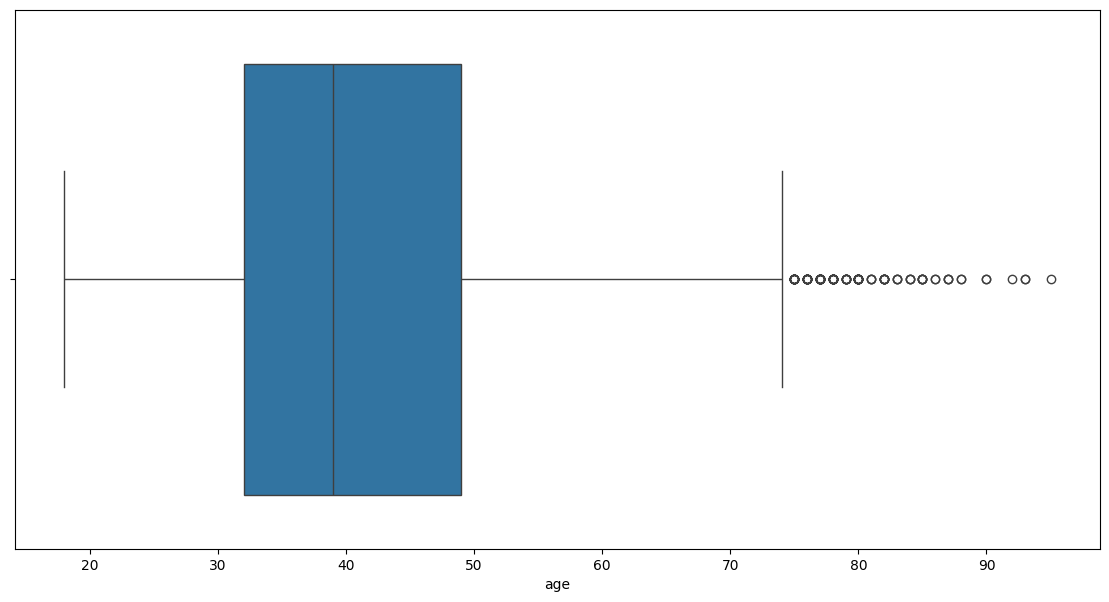

In [ ]:
#Mengecek outliers menggunakan boxplot
plt.figure(figsize = (14,7))
sns.boxplot(x = data_with_outlier['age'])

- whiskers memanjang dari sekitar usia 20 hingga 70.
- Usia mayoritas nasabah berada antara sekitar 20 hingga 70 tahun, dengan median di sekitar 40 tahun.
- Ada beberapa nasabah yang berusia di atas 70 tahun yang dianggap sebagai outliers karena usianya lebih tua dibandingkan dengan mayoritas nasabah lainnya.
- Tidak ada outliers di sisi usia yang lebih muda, yang berarti tidak ada nasabah yang usianya sangat muda dibandingkan dengan distribusi umum.

In [ ]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = data_with_outlier['age'].quantile(0.25)
Q3 = data_with_outlier['age'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan yang dianggap outliers
outliers_age = data_with_outlier['age'][(data_with_outlier['age'] < lower_bound) | (data_with_outlier['age'] > upper_bound)]

# Menampilkan yang dianggap outliers
pd.DataFrame(outliers_age)

,age
68,79
155,82
212,76
321,76
398,76
...,...
7435,79
7611,75
7674,75
7682,75


In [ ]:
#Mencari nilai umur yang tertinggi
data_with_outlier['age'].max()

95

## Job

In [ ]:
#Mencari missing value pada kolom job
data_with_outlier['job'].isnull().sum()

0

In [ ]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'job'
job_count = data_with_outlier['job'].value_counts()
pd.DataFrame(job_count)

,count
job,
management,1792
blue-collar,1346
technician,1291
admin.,936
services,658
retired,540
self-employed,280
unemployed,249
student,247


In [ ]:
#Menghitung proporsi pada kolom job
job_proportions = job_count / job_count.sum()
pd.DataFrame(round(job_proportions*100.2))

,count
job,
management,23.0
blue-collar,17.0
technician,17.0
admin.,12.0
services,8.0
retired,7.0
self-employed,4.0
unemployed,3.0
student,3.0


Selanjutnya kita ingin melakukan penelitian lebih lanjut untuk uniqvalue 'unknown'

In [ ]:
#Mencari baris data yang memiliki uniqvalue "unknown" pada kolom 'jobs'
data_with_outlier[data_with_outlier['job'] == 'unknown']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
103,45,unknown,356,no,no,cellular,aug,2,-1,unknown,no
110,41,unknown,1567,no,no,cellular,jul,2,-1,unknown,no
332,48,unknown,3,no,no,cellular,aug,2,-1,unknown,no
902,60,unknown,17297,no,no,cellular,aug,11,-1,unknown,yes
981,57,unknown,19268,no,no,unknown,oct,1,-1,unknown,yes
1039,58,unknown,1547,no,no,telephone,aug,4,-1,unknown,yes
1073,48,unknown,558,no,no,cellular,aug,6,-1,unknown,no
1079,55,unknown,2206,no,no,cellular,aug,1,91,success,yes
1142,53,unknown,549,no,no,telephone,jan,2,-1,unknown,no
1230,26,unknown,3247,no,no,telephone,feb,3,-1,unknown,no


In [ ]:
#Mencari jumlah baris data yang memiliki uniqvalue "unknown" pada kolom 'jobs'
(data_with_outlier['job'] == 'unknown').sum()

54

In [ ]:
#Mencari nilai modus untuk untuk kolom 'jobs'
data_with_outlier['job'].mode().sum()

'management'

Selanjutnya kita melakukan replace 'unknown' pada kolom jobs, kemudian  kita ganti menggunakan nilai modus yaitu ber-value management

In [ ]:
data_with_outlier['job'].replace('unknown', data_with_outlier['job'].mode()[0], inplace=True)

In [ ]:
#Melakukan verifikasi
(data_with_outlier['job'] == 'unknown').sum()

0

Data yang bervalue 'unknown' telah ter-replace dengan nilai modus, dan selanjutnya kita bisa melanjutkan pada kolom berikutnya

In [ ]:
#Melakukan compare untuk jumlah data pada kolom jobs untuk uniqvalue antara original_data dan data_with_outlier
pd.DataFrame({
    'original_data': original_data['job'].value_counts(),
    'data_with_outlier': data_with_outlier['job'].value_counts()
}).sort_values(by=['original_data', 'data_with_outlier'], ascending=False)

,original_data,data_with_outlier
job,,
management,1792,1846.0
blue-collar,1346,1346.0
technician,1291,1291.0
admin.,936,936.0
services,658,658.0
retired,540,540.0
self-employed,280,280.0
unemployed,249,249.0
student,247,247.0


Kita telah melakukan perbandingan data dalam mereplace nilai 'unknown' dan telah kita ketahui nilai 'unknown' telah berhasil dilakukan replace dengan nilai modus dan disimpan dalam data 'data_with_outlier'

##balance

###Checking

In [ ]:
#Mencari jumlah pada kolom balance yang memiliki nilai -
data_with_outlier[data_with_outlier['balance'] < 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
59,50,admin.,-194,yes,no,cellular,apr,2,-1,unknown,no
65,31,services,-327,yes,no,unknown,may,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7712,40,management,-63,no,yes,cellular,jul,1,-1,unknown,no
7757,33,technician,-479,no,no,cellular,aug,1,-1,unknown,no
7758,57,retired,-157,no,no,cellular,aug,9,-1,unknown,no
7763,28,management,-994,yes,yes,cellular,jul,2,-1,unknown,no


Selanjutnya kita melakukan drop value yang memiliki nilai (-) atau dibawah 0, karena untuk balance atau atau saldo yang ada pada rekening semestinya tidak boleh (-) atau dibawah 0, dan hal tersebut seharusnya tidak mungkin terjadi, karena saldo yang ada pada rekening dibawah 0.

In [ ]:
#Drop nilai value dibawah 0 pada kolom 'balance'
data_with_outlier.drop(data_with_outlier[data_with_outlier['balance'] < 0].index, inplace=True)

In [ ]:
#Melakukan verifikasi untuk nilai value dibawah 0 atau (-) pada kolom 'balance'
data_with_outlier[data_with_outlier['balance'] < 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


Value yang memiliki dibawah 0 atau memiliki nilai (-) pada balance telah kita hapus, selanjutnya kita bisa melanjutkan pada kolom selanjutnya

###Outliers

<Axes: xlabel='balance'>

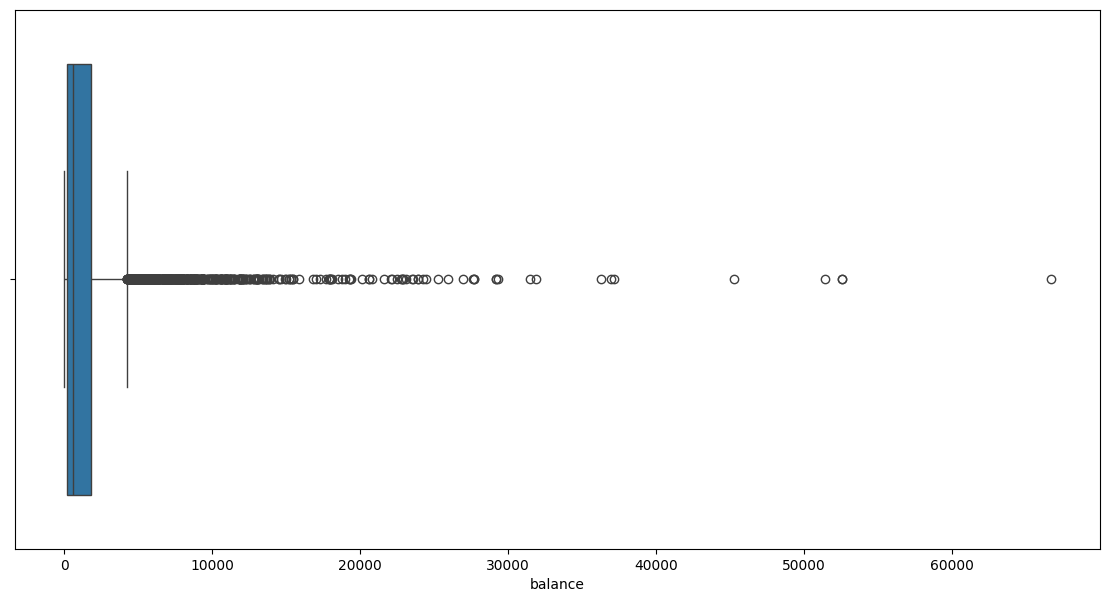

In [ ]:
#Mengecek outliers menggunakan boxplot
plt.figure(figsize = (14,7))
sns.boxplot(x = data_with_outlier['balance'])

- Saldo mayoritas nasabah sangat kecil dan mendekati nol. Hal ini bisa berarti banyak nasabah yang mungkin menggunakan produk bank, tetapi tidak menyimpan uang dalam jumlah besar.
- Banyak outliers di bagian atas: Terdapat nasabah dengan saldo jauh lebih tinggi (mulai dari 10.000 hingga lebih dari 60.000) yang dianggap sebagai outliers. Namun, outliers ini mungkin valid karena mencerminkan nasabah dengan saldo besar.
- Distribusi skewed: Distribusi data balance sangat miring (skewed) ke kanan, yang berarti hanya sedikit nasabah dengan saldo besar.

In [ ]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = data_with_outlier['balance'].quantile(0.25)
Q3 = data_with_outlier['balance'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan yang dianggap outliers
outliers_balance = data_with_outlier['balance'][(data_with_outlier['balance'] < lower_bound) | (data_with_outlier['balance'] > upper_bound)]

# Menampilkan yang dianggap outliers
pd.DataFrame(outliers_balance)

,balance
6,4803
14,4808
21,4929
36,6651
54,8725
...,...
7793,4243
7799,5381
7802,12067
7806,13901


In [ ]:
#Mencari nilai outliers pada lower_bound
data_with_outlier[data_with_outlier['balance'] < lower_bound]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [ ]:
#Mencari nilai outliers pada upper_bound
data_with_outlier[data_with_outlier['balance'] > upper_bound]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
14,30,management,4808,no,no,cellular,mar,1,-1,unknown,yes
21,57,management,4929,yes,no,telephone,jul,4,-1,unknown,no
36,47,management,6651,no,no,cellular,jul,1,412,failure,yes
54,45,unemployed,8725,no,no,cellular,jul,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7793,60,technician,4243,yes,no,cellular,feb,1,251,failure,no
7799,30,management,5381,no,no,cellular,nov,1,-1,unknown,no
7802,63,retired,12067,no,no,telephone,apr,1,191,failure,yes
7806,53,management,13901,yes,no,cellular,nov,1,-1,unknown,no


## housing

In [ ]:
#Mencari nilai value pada kolom housing dan Penanganan Inconsistencies (Inkonsistensi)
data_with_outlier['housing'].value_counts()

,count
housing,
no,4019
yes,3315


<Axes: xlabel='housing', ylabel='count'>

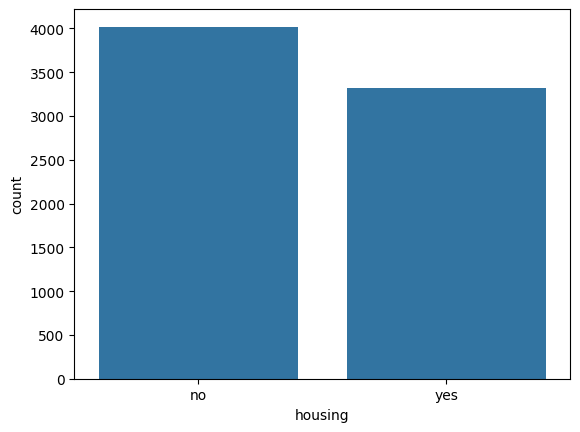

In [ ]:
#Memvisualkan data
sns.countplot(x='housing', data=data_with_outlier)

pada kolom 'housing' tidak perlu dilakukan cleaning atau penyusuaian, karena pada kolom ini, kita tidak menemukan keanehan atau anomali pada kolom housing, selanjutnya kita bisa lanjut pada kolom selanjutnya

##loan

In [ ]:
#Mencari uniq value pada kolom loan dan jumlah munculnya
data_with_outlier['loan'].value_counts()

,count
loan,
no,6464
yes,870


Pada kolom lian atau pinjaman tidak ada data yang kita lakukan handling pada kolom ini, selanjutnya kita bisa lanjut pada kolom berikutnya

##contact

In [ ]:
#Mencari uniq value pada kolom contact dan jumlah munculnya
data_with_outlier['contact'].value_counts()

,count
contact,
cellular,5338
unknown,1472
telephone,524


Selanjutnya kita mengganti nilai unknown dengan nilai modus atau nilai yang sering muncul pada kolom contact dikarenakan untuk dataset ini memiliki distribusi yang tidak normal

In [ ]:
#Mengganti nilai 'unknown' pada kolom contact dengan nilai modus
data_with_outlier['contact'].replace('unknown', data_with_outlier['contact'].mode()[0], inplace=True)

In [ ]:
#Mencari nilai modus pada kolom contact
data_with_outlier['contact'].mode()

,contact
0,cellular


In [ ]:
#Melakukan varifikasi uniq value 'unknown' pada kolom contact apakah sudah ter-replace dengan nilai modus yaitu cellular
data_with_outlier['contact'].value_counts()

,count
contact,
cellular,6810
telephone,524


In [ ]:
#Melakukan compare untuk jumlah data pada kolom contact untuk uniqvalue antara original_data dan data_with_outlier
pd.DataFrame({
    'original_data': original_data['contact'].value_counts(),
    'data_with_outlier': data_with_outlier['contact'].value_counts()
}).sort_values(by=['original_data', 'data_with_outlier'], ascending=False)

,original_data,data_with_outlier
contact,,
cellular,5628,6810.0
unknown,1639,NaN
telephone,546,524.0


Telah kita lakukan barusaja yaitu melakukan handling 'unkown' dengan mengubah nilai modus yaitu 'celullular'

##month

In [ ]:
#Mencari uniq value pada kolom month dan jumlah munculnya
data_with_outlier['month'].value_counts()

,count
month,
may,1771
aug,1046
jul,944
jun,804
apr,644
nov,637
feb,514
oct,284
jan,219


<Axes: xlabel='loan', ylabel='count'>

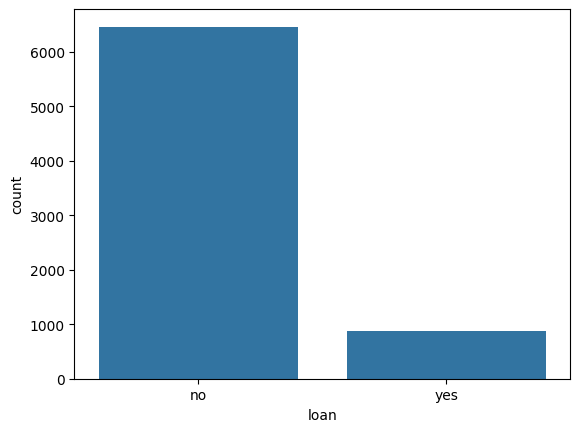

In [ ]:
#Memvisualkan data
sns.countplot(x='loan', data=data_with_outlier)

Pada kolom month setelah kita lihat, data tersebut tidak memiliki keanehan data yang ada dilihat dan tidak ditemukan NaN ataupun unknown, dan untuk bulan ditulis dalam singkatan bulan, sehingga kita bisa lanjut pengecekan pada kolom selanjutnya

##campaign

###Checking

In [ ]:
#Mencari uniq value pada kolom campaign dan jumlah munculnya
data_with_outlier['campaign'].value_counts()

,count
campaign,
1,3168
2,1972
3,859
4,517
5,242
6,183
7,94
8,83
9,41


In [ ]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'age'
campaign_count = data_with_outlier['campaign'].value_counts()
pd.DataFrame(campaign_count).sort_values(by='campaign', ascending=False)

,count
campaign,
63,1
43,1
33,1
30,4
29,2
28,1
26,2
25,1
24,3


In [ ]:
#Menghitung proporsi pada kolom campaign
campaign_proportions = campaign_count / campaign_count.sum()
pd.DataFrame(
    {'Count': campaign_count,
     'Presentasi': round(campaign_proportions*100.2)}).sort_values(by='campaign', ascending=True)

,Count,Presentasi
campaign,,
1,3168,43.0
2,1972,27.0
3,859,12.0
4,517,7.0
5,242,3.0
6,183,3.0
7,94,1.0
8,83,1.0
9,41,1.0


In [ ]:
#Mencari nilai campaign
data_with_outlier['campaign'].max()

63

In [ ]:
#Mencari baris untuk campaign yang paling sering muncul
data_with_outlier[data_with_outlier['campaign'] == data_with_outlier['campaign'].max()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
548,45,management,9051,yes,no,cellular,may,63,-1,unknown,no


###Outliers

<Axes: xlabel='campaign'>

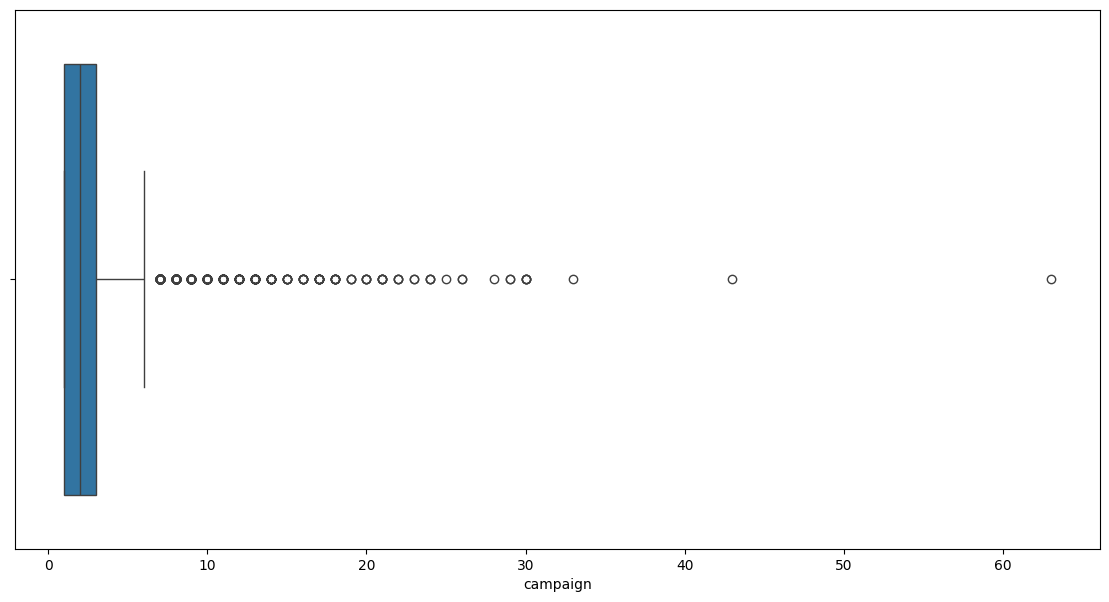

In [ ]:
#Mengecek outliers menggunakan boxplot
plt.figure(figsize = (14,7))
sns.boxplot(x = data_with_outlier['campaign'])

- Kebanyakan nasabah dihubungi antara 1 hingga 4 kali selama kampanye.
- Banyak outliers: Terdapat nasabah yang dihubungi lebih dari 10 kali bahkan hingga lebih dari 60 kali, yang menandakan mereka dihubungi secara berulang kali selama kampanye. Ini bisa berarti bahwa upaya pemasaran yang intens dilakukan pada beberapa nasabah, meskipun mungkin belum berhasil.
- Distribusi sangat skewed: Data distribusi kolom campaign sangat condong ke kanan (positively skewed), yang berarti sebagian besar nasabah dihubungi lebih sedikit, dan hanya sedikit nasabah yang dihubungi berkali-kali.

In [ ]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = data_with_outlier['campaign'].quantile(0.25)
Q3 = data_with_outlier['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan yang dianggap outliers
outliers_campaign = data_with_outlier['campaign'][(data_with_outlier['campaign'] < lower_bound) | (data_with_outlier['campaign'] > upper_bound)]

# Menampilkan yang dianggap outliers
pd.DataFrame(outliers_campaign)

,campaign
50,7
67,30
101,8
113,9
184,8
...,...
7751,10
7764,8
7786,8
7795,9


In [ ]:
#Mencari nilai outliers yang berada pada upper_bound
data_with_outlier[data_with_outlier['campaign'] > upper_bound]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
50,33,management,32,no,no,cellular,aug,7,-1,unknown,no
67,51,services,7,yes,no,cellular,jul,30,-1,unknown,no
101,48,management,0,no,yes,cellular,feb,8,-1,unknown,no
113,29,services,1008,yes,no,cellular,may,9,-1,unknown,no
184,47,student,107,no,no,telephone,jul,8,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7751,41,technician,965,no,no,cellular,aug,10,-1,unknown,yes
7764,32,blue-collar,1879,no,no,cellular,feb,8,-1,unknown,yes
7786,53,entrepreneur,1129,no,yes,cellular,jul,8,-1,unknown,no
7795,41,technician,102,yes,yes,cellular,may,9,-1,unknown,no


##pdays

###Checking

In [ ]:
#mencari nilai uniqvalue kurang dari 0 pada kolom pdays
data_with_outlier[data_with_outlier['pdays'] < 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,cellular,jun,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [ ]:
#Mencari uniq value pada kolom pdays
data_with_outlier['pdays'].value_counts()

,count
pdays,
-1,5403
92,79
91,61
182,59
181,56
...,...
62,1
320,1
375,1


Selanjutnya kita melakukan replace nilai unutuk customer yang belum pernah dihubungi, dalam dataset customer yang belum pernah di hubungi direpresentasikan dengan (-1), namun agar lebih merepresentasikan bahwa belumpernah dihubungi atau waktu terakhir dihubunginya maka kita replace dengan (0) agar tidak membingungkan

In [ ]:
#Mereplace nilai value yang kurang dari 0 pada kolom pdays diganti dengan 0 atau yang artinya belum pernah dihubungi
data_with_outlier['pdays'].replace(-1, 0, inplace=True)

In [ ]:
#mencari nilai uniqvalue kurang dari 0 pada kolom pdays
data_with_outlier[data_with_outlier['pdays'] < 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


Kita telah berhasil melakukan replace nilai (-1) dengan (0) selanjutnya kita bisa lanjut kepada kolom atau feature selanjutnya

In [ ]:
# Melihat jumlah kemunculan setiap nilai dalam kolom 'pdays'
pdays_count = data_with_outlier['pdays'].value_counts()
pd.DataFrame(pdays_count).sort_values(by='pdays', ascending=False)

,count
pdays,
854,1
828,1
805,1
782,1
778,1
...,...
5,1
4,1
2,4


In [ ]:
#Menghitung proporsi pada kolom pdays
pdays_proportions = pdays_count / pdays_count.sum()
pd.DataFrame(
    {'Count': pdays_count,
     'Presentasi': round(pdays_proportions*100.2)}).sort_values(by='pdays', ascending=True)

,Count,Presentasi
pdays,,
0,5403,74.0
1,3,0.0
2,4,0.0
4,1,0.0
5,1,0.0
...,...,...
778,1,0.0
782,1,0.0
805,1,0.0


###Outliers

<Axes: xlabel='pdays'>

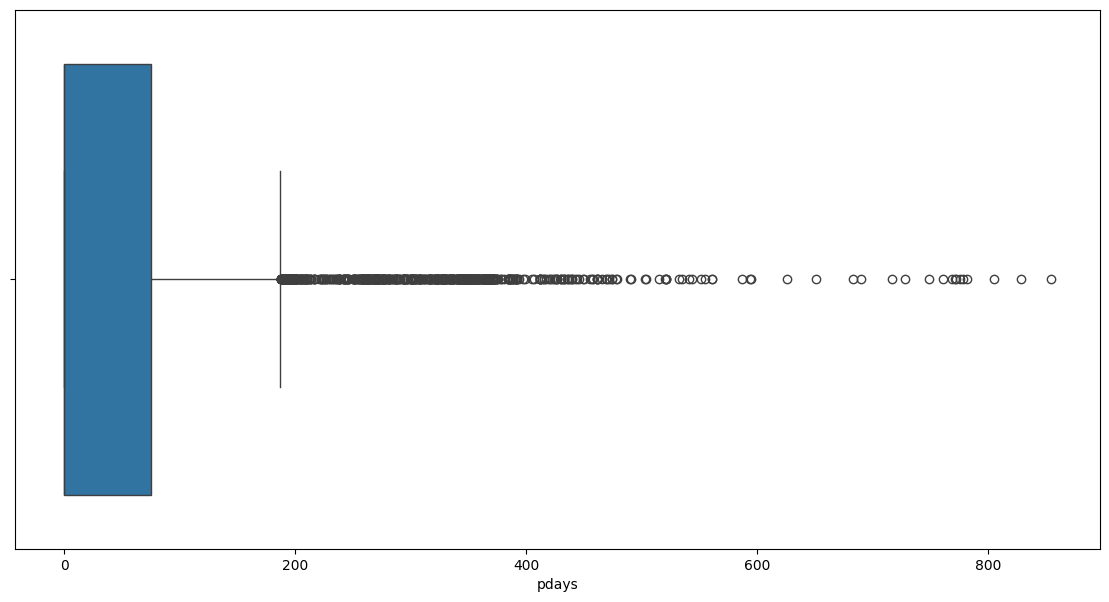

In [ ]:
#Mengecek outliers menggunakan boxplot
plt.figure(figsize = (14,7))
sns.boxplot(x = data_with_outlier['pdays'])

- Nilai pdays menunjukkan jumlah hari sejak nasabah terakhir kali dihubungi dalam kampanye sebelumnya.
- Sebagian besar nasabah memiliki pdays yang rendah, menunjukkan bahwa mereka baru saja dihubungi kembali atau belum pernah dihubungi sebelumnya.
- Banyak outliers menunjukkan nasabah yang dihubungi kembali setelah waktu yang sangat lama, beberapa bahkan lebih dari 600 hari.

In [ ]:
# Menghitung Q1 (quartile 1), Q3 (quartile 3), dan IQR
Q1 = data_with_outlier['pdays'].quantile(0.25)
Q3 = data_with_outlier['pdays'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan yang dianggap outliers
outliers_pdays = data_with_outlier['pdays'][(data_with_outlier['pdays'] < lower_bound) | (data_with_outlier['pdays'] > upper_bound)]

# Menampilkan yang dianggap outliers
pd.DataFrame(outliers_pdays)

,pdays
2,352
18,263
20,355
32,294
36,412
...,...
7742,196
7756,296
7782,422
7793,251


##poutcome

In [ ]:
#Mencari uniq value pada kolom poutcome
data_with_outlier['poutcome'].value_counts()

,count
poutcome,
unknown,5405
failure,804
success,754
other,371


 Nilai "unknown" berarti hasil dari kampanye sebelumnya tidak diketahui atau nasabah belum pernah berpartisipasi dalam kampanye sebelumnya.

memperlakukan 'unknown' sebagai kategori tersendiri. Ini efektif jika kategori 'unknown' memiliki jumlah yang signifikan dan berpotensi memberikan insight tentang nasabah yang belum pernah dihubungi. Model akan memiliki pemahaman yang lebih baik

###unknown

In [ ]:
#Mereplace nilai value yang kurang dari 'unknown' pada kolom poutcome diganti dengan 'No Previous Campaign' atau yang artinya belum pernah dihubungi
data_with_outlier['poutcome'].replace('unknown', 'No Previous Campaign', inplace=True)

In [ ]:
#Melakukan validasi telah terreplace atau belum
data_with_outlier['poutcome'].value_counts()

,count
poutcome,
No Previous Campaign,5405
failure,804
success,754
other,371


nilai unknown telah terreplace dengan `No Previous Campaign`

###other

In [ ]:
#Mencari nilai other pada kolom poutcome  memiliki nilai persentasi
pd.DataFrame({
    'Jumlah': data_with_outlier['poutcome'].value_counts(),
    'Presentasi': (data_with_outlier['poutcome'].value_counts(normalize=True) * 100).round(2)
})

,Jumlah,Presentasi
poutcome,,
No Previous Campaign,5405,73.70
failure,804,10.96
success,754,10.28
other,371,5.06


nilai "other" sangat jarang muncul, kita dapat mempertimbangkan untuk menggabungkan nilai ini dengan kategori lain yang lebih relevan, seperti "failure". Ini dapat membantu menyederhanakan data dan mengurangi jumlah kategori yang jarang muncul.

Menggabungkan "other" dengan "failure" dapat membuat model lebih sederhana dan mudah dipahami

In [ ]:
#Mereplace nilai other dengan failure
data_with_outlier['poutcome'].replace('other', 'failure', inplace=True)

In [ ]:
#Melakukan validasi telah terreplace atau belum
data_with_outlier['poutcome'].value_counts()

,count
poutcome,
No Previous Campaign,5405
failure,1175
success,754


##deposit

In [ ]:
#Mencari uniqvalue pada kolom deposit
data_with_outlier['deposit'].value_counts()

,count
deposit,
no,3742
yes,3592


pada kolom atau feature deposit data yang kita miliki sudah tidak ada yang perlu dirubah atau dilakukan handling, dikarenakan data sudah cukup normal

Selanjutnya setelah kita melakukan data cleaning, kita dapat melakukan pemrosesan pada tahap selanjutnya untuk dataset ini.

# EDA (Exploratory Data Analysis)

In [ ]:
data_with_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7334 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7334 non-null   int64 
 1   job       7334 non-null   object
 2   balance   7334 non-null   int64 
 3   housing   7334 non-null   object
 4   loan      7334 non-null   object
 5   contact   7334 non-null   object
 6   month     7334 non-null   object
 7   campaign  7334 non-null   int64 
 8   pdays     7334 non-null   int64 
 9   poutcome  7334 non-null   object
 10  deposit   7334 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


In [ ]:
data_with_outlier.describe()

,age,balance,campaign,pdays
count,7334.000000,7334.000000,7334.000000,7334.000000
mean,41.357649,1633.152986,2.505590,53.067630
std,12.049032,3148.992317,2.711635,107.947887
min,18.000000,0.000000,1.000000,0.000000
25%,32.000000,186.000000,1.000000,0.000000
50%,39.000000,619.500000,2.000000,0.000000
75%,49.000000,1806.500000,3.000000,75.000000
max,95.000000,66653.000000,63.000000,854.000000


##Analisis Distribusi Variabel Target (Deposit)

Analisis ini penting untuk memahami distribusi antara kategori "yes" dan "no", serta apakah ada ketidakseimbangan data (imbalanced data).

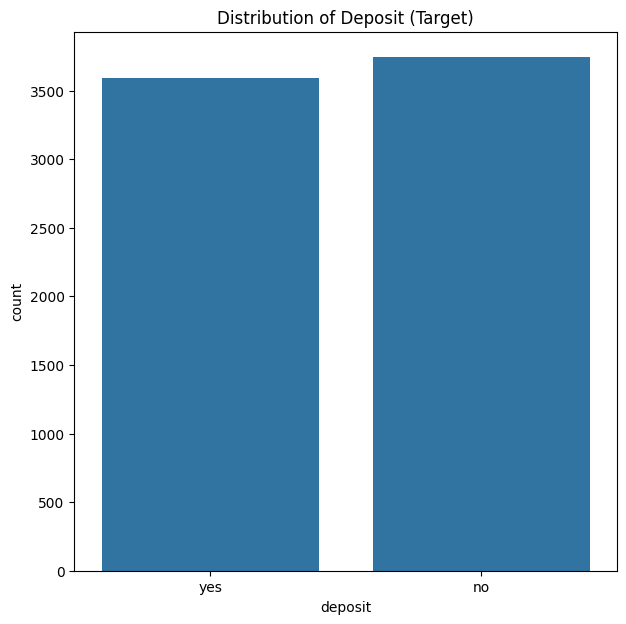

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='deposit', data=data_with_outlier)
plt.title('Distribution of Deposit (Target)')
plt.show()

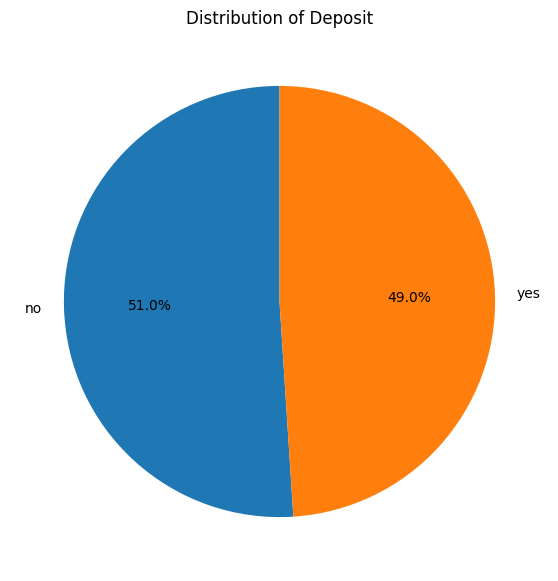

In [ ]:
#Menggunakan piechart
plt.figure(figsize=(7, 7))
plt.pie(data_with_outlier['deposit'].value_counts(), labels=data_with_outlier['deposit'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Deposit')
plt.show()

- Jumlah nasabah yang melakukan deposito (yes) dan yang tidak (no) hampir seimbang. Ini berarti, dalam dataset ini, tidak ada ketidakseimbangan kelas yang signifikan. Kedua kelas (yes dan no) memiliki jumlah yang hampir sama.
- Tidak ada masalah ketidakseimbangan data (imbalanced data), yang berarti kita tidak perlu khawatir mengenai bias model machine learning terhadap salah satu kelas.
- Dengan distribusi yang seimbang, algoritma machine learning yang digunakan nantinya dapat dilatih dengan baik untuk mengenali pola di kedua kelas (yes dan no), sehingga tidak perlu melakukan teknik resampling seperti SMOTE atau undersampling.

***Kesimpulan***
- Balance Data: Dataset ini seimbang dalam hal jumlah nasabah yang melakukan deposito dan yang tidak. Ini adalah kondisi yang ideal karena model yang akan kita bangun tidak perlu khawatir terhadap bias dari data yang tidak seimbang.
- Tidak Perlu Resampling: Karena kedua kelas seimbang, kita tidak perlu melakukan oversampling atau undersampling untuk menangani ketidakseimbangan kelas.

##Distribusi dan Outliers pada Variabel Numerik

Variabel numerik seperti age, balance, campaign, dan pdays adalah fitur penting yang mungkin berkaitan dengan keputusan nasabah. Kita perlu menganalisis distribusi dan outlier untuk memahami apakah data ini terdistribusi dengan baik atau memiliki outlier yang signifikan.


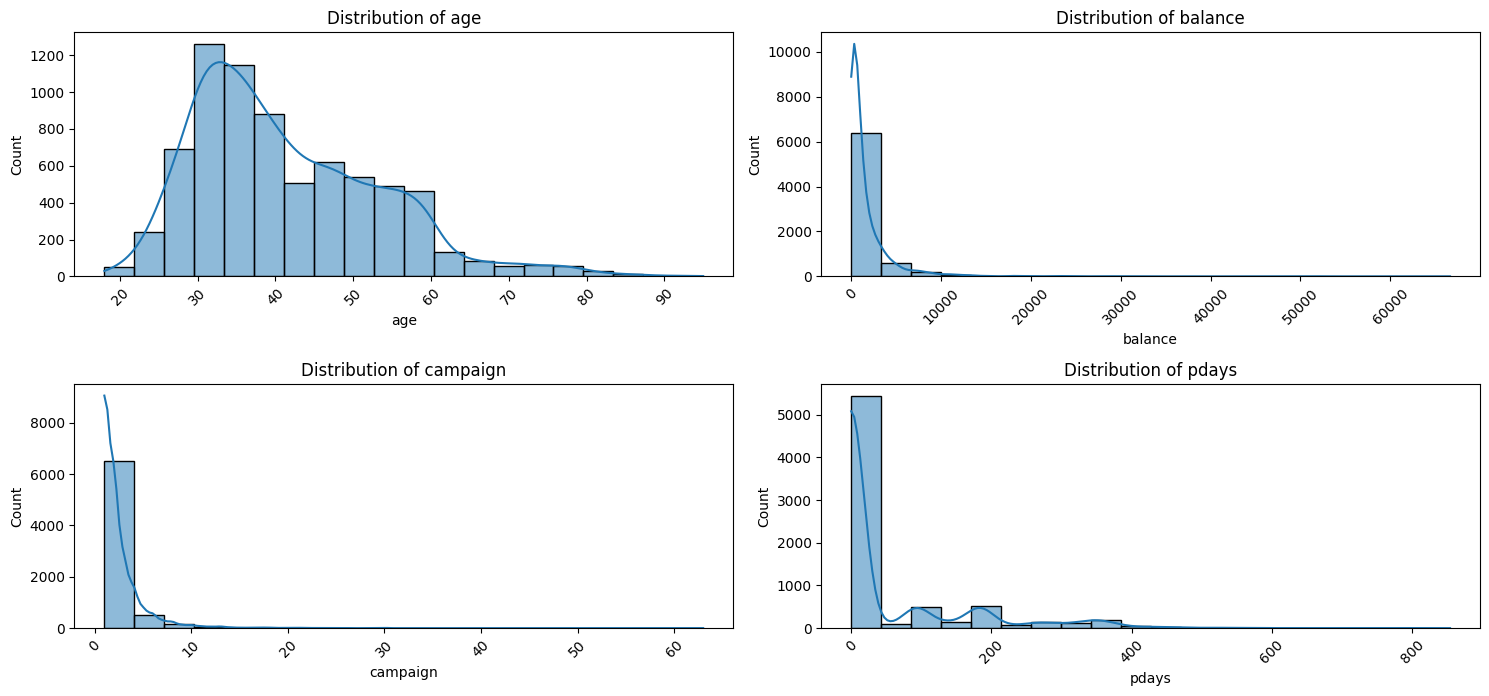

In [ ]:
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns,1):
  plt.subplot(3, 2, i)
  sns.histplot(data_with_outlier[col], bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  i += 1

plt.tight_layout()
plt.show()

***Distribution of Age:***
- Distribusi usia nasabah cenderung normal dengan sedikit kemiringan ke kanan. Usia mayoritas nasabah berkisar antara 30 hingga 40 tahun, dengan puncak distribusi di sekitar usia 30.
- Usia ini mencerminkan segmen nasabah yang berada pada masa produktif dan kemungkinan besar memiliki pendapatan tetap serta minat terhadap produk keuangan seperti deposito. Usia lebih tua (di atas 60 tahun) menunjukkan penurunan signifikan, yang mungkin mencerminkan masa pensiun atau pengurangan aktivitas keuangan.

***Distribution of Balance:***
- Distribusi saldo sangat miring ke kanan. Sebagian besar nasabah memiliki saldo yang rendah, dengan jumlah saldo berkisar dekat dengan 0, tetapi terdapat beberapa nasabah yang memiliki saldo sangat tinggi (outlier) hingga lebih dari 60.000.
- Hal ini menunjukkan ketidakseimbangan dalam distribusi kekayaan nasabah, dengan sebagian besar nasabah yang mungkin hanya memiliki saldo kecil atau mungkin hanya menggunakan bank untuk transaksi sehari-hari. Sementara itu, outlier dengan saldo sangat tinggi bisa menjadi nasabah kaya yang memiliki likuiditas lebih untuk melakukan investasi, seperti deposito.

***Distribution of Campaign:***
- Sebagian besar nasabah dihubungi hanya 1-2 kali dalam kampanye, dengan distribusi sangat miring ke kanan. Sangat sedikit nasabah yang dihubungi lebih dari 10 kali.
- Mayoritas kampanye hanya melibatkan sedikit kontak dengan nasabah, yang mungkin cukup efektif untuk nasabah tertentu. Namun, untuk nasabah yang dihubungi berkali-kali, hasil kampanye mungkin kurang optimal. Jumlah kontak yang terlalu banyak mungkin menunjukkan adanya upaya pemasaran yang kurang efisien atau nasabah yang sulit direspon.

***Distribution of Pdays (Number of Days Since Last Contact):***
- Mayoritas nasabah memiliki nilai 0 atau -1 pada pdays, yang berarti mereka belum pernah dihubungi dalam kampanye sebelumnya atau baru saja dihubungi. Sedikit nasabah memiliki nilai pdays yang lebih tinggi (mereka yang dihubungi beberapa waktu lalu).
- Hal ini menunjukkan bahwa banyak nasabah mungkin baru pertama kali dihubungi dalam kampanye ini. Nasabah yang memiliki nilai pdays tinggi mungkin menunjukkan hasil dari kampanye sebelumnya yang sudah lama, dan mereka mungkin memerlukan lebih banyak kontak untuk membuat keputusan.

***Kesimpulan Umum:***
- Age: Mayoritas nasabah berada di usia produktif (sekitar 30-40 tahun), yang cenderung berpengaruh pada keputusan finansial.
- Balance: Saldo nasabah menunjukkan distribusi yang tidak merata dengan beberapa nasabah memiliki saldo sangat tinggi (outliers). Ini bisa berdampak besar pada kemampuan nasabah untuk melakukan deposito.
- Campaign: Sebagian besar kampanye hanya melibatkan sedikit kontak, tetapi ada beberapa nasabah yang dihubungi berulang kali. Ini perlu dianalisis lebih lanjut untuk mengetahui apakah upaya tersebut efektif.
- Pdays: Banyak nasabah baru yang dihubungi, sementara beberapa lainnya mungkin memerlukan kontak lanjutan setelah kampanye sebelumnya.

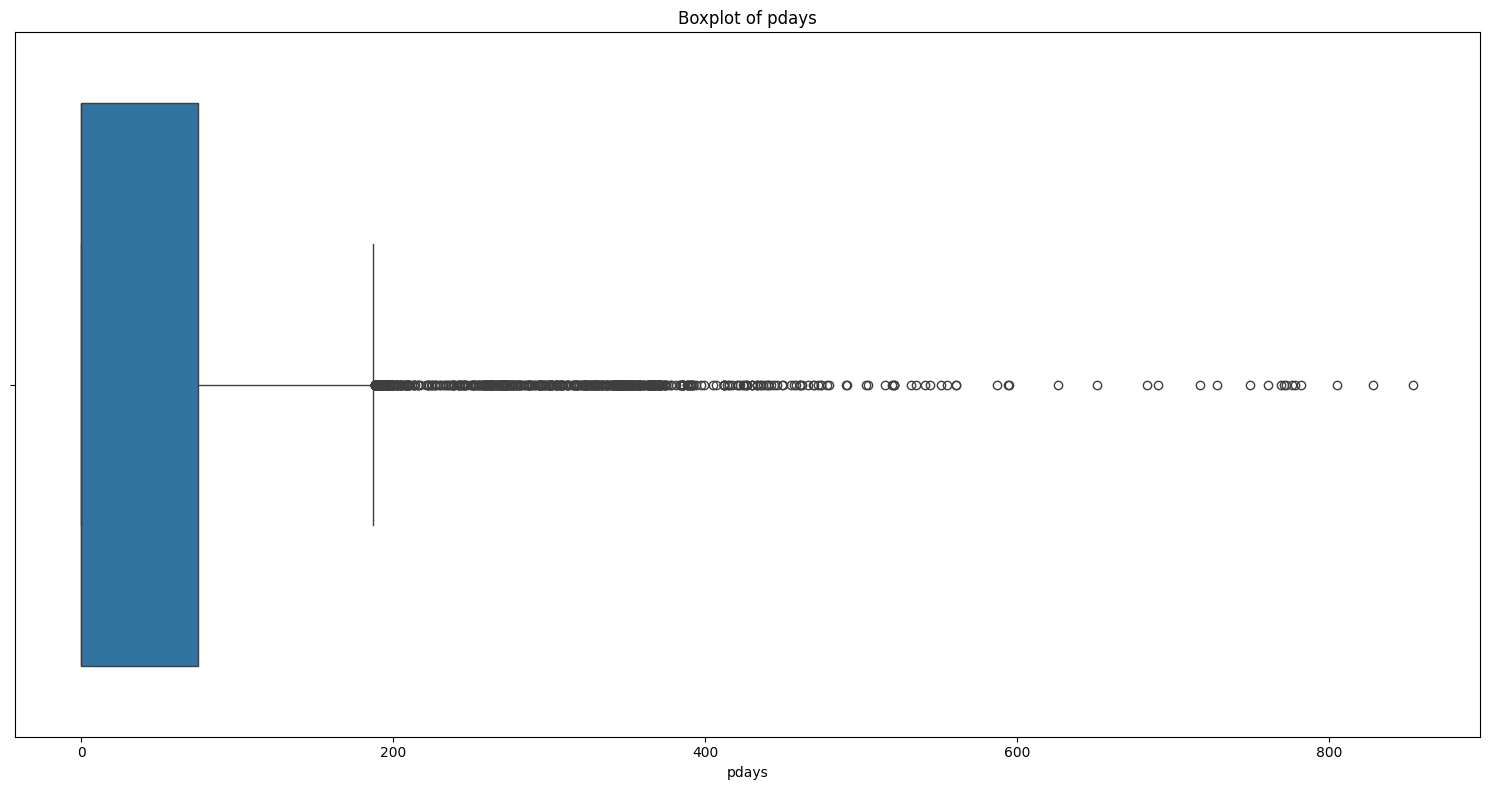

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=data_with_outlier[col])
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

1. ***Distribusi pdays:***
  - Mayoritas nilai pdays berada di 0: Berdasarkan boxplot, sebagian besar nasabah memiliki nilai pdays = 0, yang berarti mereka belum pernah dihubungi sebelumnya atau baru saja dihubungi. Ini ditunjukkan oleh bar besar di bagian paling kiri dari boxplot.
  - Distribusi nilai lainnya: Untuk nasabah yang dihubungi sebelumnya, nilai pdays bervariasi dan tersebar hingga di atas 800 hari. Namun, ini adalah kasus yang lebih jarang.
2. ***Outliers:***
  - Banyak outliers pada nilai pdays yang tinggi: Di sebelah kanan boxplot, terlihat banyak outliers dengan nilai pdays di atas sekitar 200 hari. Ini menunjukkan bahwa ada sejumlah kecil nasabah yang dihubungi dalam kampanye yang sangat lama (lebih dari 200 hari hingga 800 hari sejak kampanye sebelumnya). Ini berarti bahwa meskipun sebagian besar nasabah baru atau baru saja dihubungi, ada beberapa yang sudah lama tidak dihubungi.
3. ***Penyebaran Data:***
  - Rentang interquartile (IQR): Sebagian besar nilai pdays (data utama) terletak di dekat nilai 0, yang menunjukkan bahwa banyak nasabah baru dihubungi atau mereka yang telah dihubungi kembali dalam waktu singkat.
  - Median: Median dari distribusi pdays sangat dekat dengan 0, yang berarti lebih dari setengah nasabah belum pernah dihubungi dalam kampanye sebelumnya atau telah dihubungi sangat baru-baru ini.

***Kesimpulan:***
- Banyak nasabah baru atau yang belum dihubungi sebelumnya: Mayoritas nasabah memiliki pdays = 0, yang menunjukkan bahwa banyak dari mereka mungkin belum pernah dihubungi dalam kampanye sebelumnya.
- Outliers pada nilai pdays yang tinggi: Ada sejumlah kecil nasabah yang sudah lama tidak dihubungi (lebih dari 200 hari), yang dapat dianggap sebagai outliers.
- Implikasi untuk kampanye pemasaran: Nasabah yang dihubungi lebih lama sebelumnya mungkin memerlukan pendekatan yang berbeda dibandingkan nasabah yang baru saja dihubungi atau yang baru pertama kali dihubungi.

##Hubungan antara Variabel Numerik dan Target (Deposit)

Mengetahui bagaimana variabel numerik seperti age, balance, dan campaign mempengaruhi apakah nasabah akan melakukan deposito adalah kunci. Analisis ini akan membantu kita menentukan variabel mana yang memiliki pengaruh besar pada keputusan nasabah.

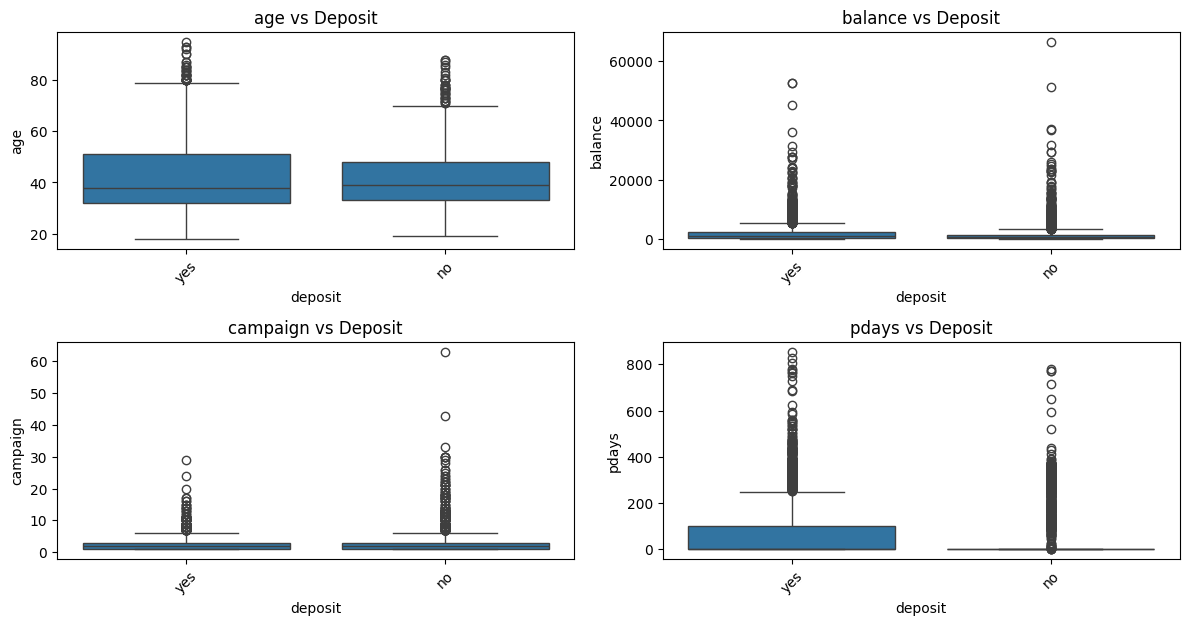

In [ ]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(numerical_columns,1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='deposit', y=data_with_outlier[col], data=data_with_outlier)
    plt.title(f'{col} vs Deposit')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

***Age vs Deposit:***
- Distribusi usia antara nasabah yang melakukan deposito ("yes") dan yang tidak ("no") tampak serupa. Kedua kelompok memiliki rentang usia yang hampir sama, dengan mayoritas nasabah berada pada rentang usia 30 hingga 50 tahun.
- Median usia untuk kedua kategori sama-sama berada di sekitar 40 tahun.
- Outliers: Ada beberapa nasabah yang usianya lebih tua (di atas 60 tahun) yang muncul sebagai outliers dalam kedua kelompok, meskipun jumlahnya tidak signifikan.
- Kesimpulan: Usia tidak menunjukkan perbedaan signifikan dalam mempengaruhi keputusan untuk melakukan deposito. Nasabah dari berbagai rentang usia memiliki probabilitas yang serupa untuk melakukan atau tidak melakukan deposito.

***Balance vs Deposit:***
- Distribusi saldo memperlihatkan perbedaan yang mencolok antara nasabah yang melakukan deposito dan yang tidak.
Nasabah yang melakukan deposito (yes) memiliki saldo yang secara umum lebih tinggi dibandingkan dengan nasabah yang tidak melakukan deposito (no).
- Median saldo untuk nasabah yang melakukan deposito lebih tinggi daripada yang tidak. Terlihat juga bahwa sebagian besar nasabah yang melakukan deposito memiliki saldo yang lebih variatif dengan banyak outliers (saldo tinggi di atas 10.000 hingga 60.000).
- Outliers: Terdapat banyak outliers di kedua kategori, tetapi outliers dengan saldo sangat tinggi (lebih dari 20.000) lebih sering muncul pada nasabah yang melakukan deposito.
- Kesimpulan: Saldo nasabah merupakan indikator yang signifikan dalam keputusan untuk melakukan deposito. Nasabah dengan saldo lebih tinggi cenderung lebih mungkin untuk melakukan deposito.

***Campaign vs Deposit:***
- Distribusi jumlah kontak selama kampanye menunjukkan bahwa nasabah yang tidak melakukan deposito (no) dan yang melakukan deposito (yes) sama-sama memiliki mayoritas jumlah kontak yang rendah (1-2 kali).
- Outliers: Terdapat outliers di kedua kelompok, terutama nasabah yang dihubungi lebih dari 10 kali. Terlihat bahwa beberapa nasabah yang tidak melakukan deposito dihubungi hingga lebih dari 50 kali, sementara nasabah yang melakukan deposito cenderung dihubungi lebih sedikit.
- Kesimpulan: Jumlah kontak yang terlalu banyak tidak menjamin keberhasilan kampanye pemasaran. Bahkan, nasabah yang dihubungi berkali-kali tampaknya tidak cenderung lebih mungkin melakukan deposito, dan bisa jadi malah sebaliknya.

***Pdays vs Deposit:***
- Distribusi pdays (jumlah hari sejak kampanye sebelumnya) menunjukkan bahwa nasabah yang melakukan deposito memiliki distribusi pdays yang lebih tersebar dibandingkan nasabah yang tidak melakukan deposito.
- Sebagian besar nasabah yang tidak melakukan deposito memiliki pdays yang mendekati 0, menunjukkan bahwa mereka baru saja dihubungi atau belum pernah dihubungi sebelumnya. Sementara itu, nasabah yang melakukan deposito memiliki pdays yang lebih variatif, bahkan ada beberapa outliers dengan pdays lebih dari 200 hari.
- Outliers: Terdapat beberapa outliers pada pdays tinggi (lebih dari 400 hari) di kedua kelompok, tetapi lebih sering terjadi pada nasabah yang melakukan deposito.
- Kesimpulan: Pdays tampaknya memiliki beberapa keterkaitan dengan hasil kampanye. Nasabah yang dihubungi dalam jangka waktu yang lebih lama setelah kampanye sebelumnya cenderung lebih mungkin melakukan deposito.

***Kesimpulan Umum:***
- Saldo (Balance) adalah fitur yang paling signifikan dalam memprediksi apakah nasabah akan melakukan deposito atau tidak. Nasabah dengan saldo lebih tinggi cenderung melakukan deposito.
- Jumlah kontak kampanye (Campaign) tampaknya tidak menjadi penentu yang kuat, dan jumlah kontak yang terlalu banyak bahkan mungkin kurang efektif.
- Pdays menunjukkan bahwa nasabah yang baru pertama kali dihubungi atau dihubungi setelah jangka waktu yang lama berpotensi lebih tertarik untuk melakukan deposito.
- Usia (Age) tidak menunjukkan perbedaan yang signifikan antara nasabah yang melakukan deposito dan yang tidak.

##Distribusi dan Hubungan Variabel Kategorikal dengan Target


Variabel kategorikal seperti job (pekerjaan), housing (kepemilikan rumah), loan (pinjaman), poutcome (hasil kampanye sebelumnya), dan contact (jenis kontak) dapat sangat berpengaruh terhadap keputusan nasabah. Misalnya, nasabah yang pernah sukses dalam kampanye sebelumnya (poutcome = 'success') mungkin lebih cenderung melakukan deposito.

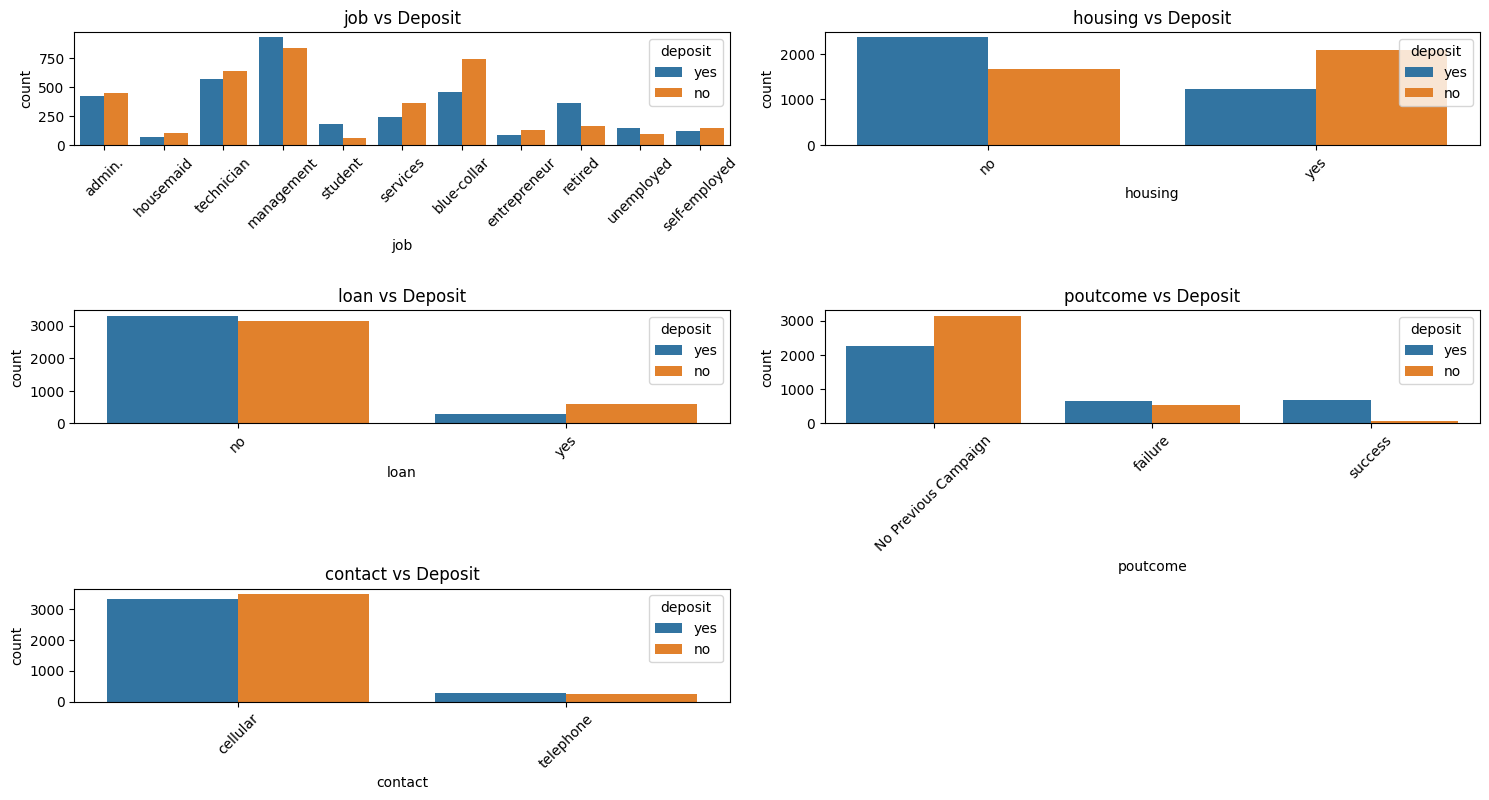

In [ ]:
categorical_columns = ['job', 'housing', 'loan', 'poutcome', 'contact']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns,1):
  plt.subplot(4, 2, i)
  sns.countplot(x=col, hue='deposit', data=data_with_outlier)
  plt.title(f'{col} vs Deposit')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


***Job vs Deposit:***
- Distribusi Pekerjaan: Beberapa kategori pekerjaan menunjukkan perbedaan yang signifikan dalam keputusan deposito.
    - Management dan technician adalah pekerjaan dengan jumlah nasabah tertinggi, dan di kedua kelompok ini lebih banyak nasabah yang tidak melakukan deposito (no) dibandingkan yang melakukan deposito (yes).
    - Retired dan students menunjukkan tren yang berbeda, di mana lebih banyak dari mereka yang melakukan deposito (yes) daripada yang tidak. Ini bisa menunjukkan bahwa orang yang sudah pensiun dan pelajar lebih tertarik pada deposito, mungkin karena mereka mencari investasi yang lebih aman.

- Kesimpulan: Pekerjaan tertentu, seperti retired dan students, lebih cenderung melakukan deposito, sedangkan nasabah dari kelompok pekerjaan management dan blue-collar lebih cenderung tidak melakukan deposito.

***Housing vs Deposit:***
- Distribusi Kepemilikan Rumah: Nasabah yang tidak memiliki rumah (no housing) cenderung lebih banyak melakukan deposito dibandingkan yang memiliki rumah (yes housing).
- Kesimpulan: Nasabah yang memiliki rumah mungkin memiliki komitmen finansial lain, seperti cicilan rumah, sehingga lebih sedikit yang melakukan deposito. Di sisi lain, nasabah yang tidak memiliki rumah mungkin memiliki dana yang lebih likuid untuk diinvestasikan dalam bentuk deposito.


***Loan vs Deposit:***
- Distribusi Pinjaman Pribadi: Sebagian besar nasabah yang melakukan deposito adalah mereka yang tidak memiliki pinjaman (no loan). Sebaliknya, nasabah yang memiliki pinjaman (yes loan) jauh lebih sedikit melakukan deposito.
- Kesimpulan: Pinjaman pribadi tampaknya berhubungan dengan keputusan untuk tidak melakukan deposito. Nasabah yang memiliki pinjaman mungkin lebih terbebani secara finansial, sehingga mereka kurang tertarik untuk berinvestasi dalam deposito.

***Poutcome (Hasil Kampanye Sebelumnya) vs Deposit:***
- Distribusi Hasil Kampanye Sebelumnya:
  - Nasabah yang belum pernah berpartisipasi dalam kampanye sebelumnya (No Previous Campaign) cenderung lebih banyak yang tidak melakukan deposito.
  - Untuk nasabah yang mengalami kampanye sebelumnya dengan hasil success, mereka jauh lebih mungkin untuk melakukan deposito pada kampanye saat ini.
  - Sebaliknya, nasabah dengan hasil failure dari kampanye sebelumnya cenderung tidak melakukan deposito.
- Kesimpulan: Hasil kampanye sebelumnya memainkan peran besar. Nasabah yang mengalami keberhasilan dalam kampanye sebelumnya lebih mungkin melakukan deposito, sedangkan mereka yang gagal atau tidak pernah dihubungi sebelumnya lebih cenderung tidak melakukan deposito.

***Contact vs Deposit:***
- Distribusi Jenis Kontak: Sebagian besar nasabah dihubungi melalui cellular, dan ada keseimbangan antara yang melakukan dan tidak melakukan deposito.
  - Namun, untuk nasabah yang dihubungi melalui telephone, sebagian besar tidak melakukan deposito.
- Kesimpulan: Jenis kontak mungkin mempengaruhi keputusan. Contact melalui cellular lebih efektif dalam menghasilkan deposito dibandingkan telephone. Ini mungkin karena nasabah lebih responsif atau nyaman berkomunikasi melalui telepon seluler daripada saluran telepon tetap (landline).

***Kesimpulan:***
- Pekerjaan: Nasabah dengan pekerjaan seperti retired dan students lebih cenderung melakukan deposito dibandingkan dengan pekerjaan lainnya.
- Kepemilikan Rumah: Nasabah yang tidak memiliki rumah lebih cenderung melakukan deposito.
- Pinjaman Pribadi: Nasabah yang tidak memiliki pinjaman lebih cenderung melakukan deposito.
- Hasil Kampanye Sebelumnya: Nasabah yang sukses di kampanye sebelumnya jauh lebih cenderung melakukan deposito.
- Jenis Kontak: Kontak melalui cellular lebih efektif dalam menghasilkan deposito dibandingkan telephone.

##Analisis Korelasi Antar Variabel Numerik

Mengetahui apakah ada korelasi yang signifikan antara variabel numerik, seperti balance dan pdays, dapat membantu dalam pemilihan fitur yang akan digunakan dalam model. Selain itu, ini juga membantu mendeteksi adanya multikolinearitas.


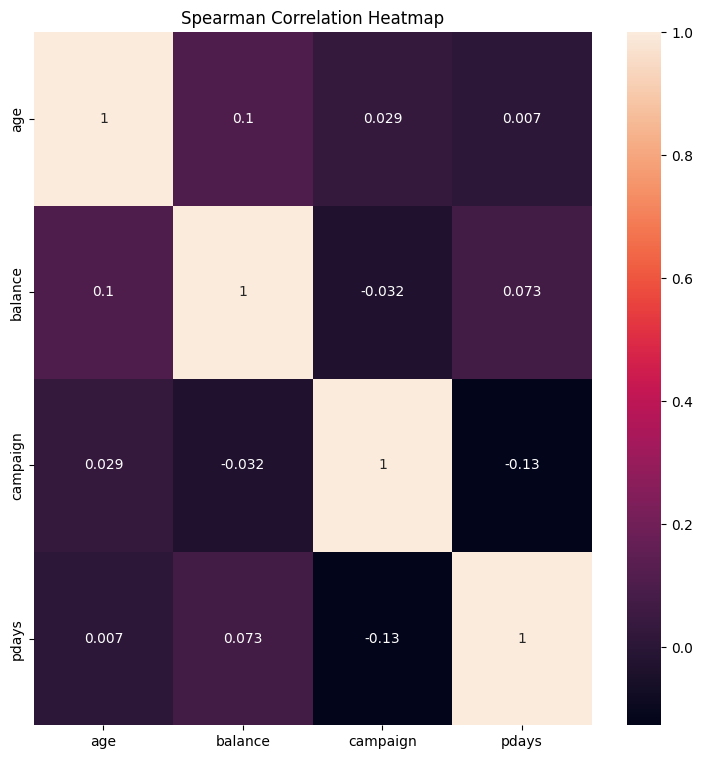

In [ ]:
plt.figure(figsize=(9, 9))
corr_matrix = data_with_outlier[numerical_columns].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True)
plt.title('Spearman Correlation Heatmap')
plt.show()


***Age vs Balance:***
- Korelasi positif lemah sebesar 0.1, menunjukkan ada sedikit kecenderungan bahwa nasabah yang lebih tua memiliki saldo yang lebih tinggi, tetapi korelasinya sangat lemah dan mungkin tidak signifikan secara praktis.

***Age vs Campaign:***
- Korelasi sangat lemah sebesar 0.029, menunjukkan bahwa usia tidak berkorelasi dengan jumlah kontak yang dilakukan selama kampanye.

***Age vs Pdays:***
- Korelasi lemah sebesar 0.007, menunjukkan bahwa tidak ada hubungan yang signifikan antara usia dan jumlah hari sejak nasabah dihubungi terakhir kali dalam kampanye sebelumnya.

***Balance vs Campaign:***
- Korelasi negatif sangat lemah sebesar -0.032, yang berarti saldo nasabah hampir tidak berkorelasi dengan jumlah kontak selama kampanye. Ini menunjukkan bahwa nasabah dengan saldo besar maupun kecil cenderung dihubungi dalam frekuensi yang serupa.

***Balance vs Pdays:***
- Korelasi lemah positif sebesar 0.073, menunjukkan ada sedikit kecenderungan bahwa nasabah dengan saldo yang lebih besar mungkin telah dihubungi lebih lama setelah kampanye sebelumnya, tetapi ini juga hubungan yang sangat lemah.

***Campaign vs Pdays:***
- Korelasi negatif lemah sebesar -0.13, menunjukkan bahwa semakin sering nasabah dihubungi dalam kampanye ini, semakin kecil kemungkinan mereka telah dihubungi dalam kampanye sebelumnya. Ini mungkin mengindikasikan bahwa nasabah baru cenderung dihubungi lebih banyak kali, sementara nasabah lama yang pernah dihubungi sebelumnya tidak dihubungi sebanyak itu.

***Kesimpulan***
- `Korelasi sangat lemah di antara semua variabel`. Ini berarti tidak ada hubungan linier atau monoton yang kuat di antara mereka. Meskipun demikian, ini bukan berarti variabel-variabel ini tidak penting untuk pemodelan; hubungan yang lebih kompleks mungkin masih ada, dan dapat ditemukan menggunakan teknik pemodelan yang lebih canggih.
- `Tidak ada multikolinearitas`: Tidak ada dua variabel yang sangat berkorelasi satu sama lain, sehingga semua variabel ini dapat digunakan dalam pemodelan tanpa modifikasi tambahan terkait multikolinearitas.

#Data Spliting

In [ ]:
#melakukan spliting data untuk feature dan target
X = data_with_outlier.drop('deposit', axis=1)
y = data_with_outlier['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y # JANGAN SAMPAI LUPA UNTUK KLASIFIKASI di stratify
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5867, 10), (1467, 10), (5867,), (1467,))

#Data Preparation

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [ ]:
data_with_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7334 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7334 non-null   int64 
 1   job       7334 non-null   object
 2   balance   7334 non-null   int64 
 3   housing   7334 non-null   object
 4   loan      7334 non-null   object
 5   contact   7334 non-null   object
 6   month     7334 non-null   object
 7   campaign  7334 non-null   int64 
 8   pdays     7334 non-null   int64 
 9   poutcome  7334 non-null   object
 10  deposit   7334 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


In [ ]:
transformer = ColumnTransformer([
        ('one hot', OneHotEncoder(drop = 'first'), ['housing','loan','contact','poutcome']),
        ('binary', BinaryEncoder(), ['job','month']),
        ('scaler', RobustScaler(), X_train.select_dtypes(include = 'number').columns)
    ],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job', 'month']),
                                ('scaler', RobustScaler(),
                                 Index(['age', 'balance', 'campaign', 'pdays'], dtype='object'))])

***`OneHotEncoder` pada kolom ['housing', 'loan', 'contact', 'poutcome']:***

- Kolom housing, loan, contact, dan poutcome adalah kolom kategorikal dengan kategori diskrit, sehingga One-Hot Encoding adalah pilihan yang tepat. Dengan drop='first', Kita menghindari masalah multikolinearitas dengan menghilangkan satu kategori dari encoding.
- Alasan menggunakan OneHotEncoder untuk kolom tersebut karena setiap uniq value yang ada pada kolom tersebut memiliki dibawah 5uniqvalue


`BinaryEncoder` pada kolom ['job', 'month']:

- job memiliki banyak kategori (seperti admin, blue-collar, technician, dll.), sehingga BinaryEncoder adalah pilihan yang tepat karena mengurangi jumlah kolom yang dihasilkan dibandingkan One-Hot Encoding.
- month juga cocok untuk BinaryEncoder karena ini variabel yang berisi 12 bulan. BinaryEncoder lebih efektif dibandingkan One-Hot Encoding jika kita ingin mengurangi kompleksitas data.

`RobustScaler` pada semua kolom numerik:

- Sesuai: Menggunakan RobustScaler adalah pilihan yang sangat baik untuk menangani data numerik, terutama dalam dataset ini yang mungkin memiliki outliers, seperti pada kolom balance (karena bisa memiliki nilai sangat tinggi) atau pdays (karena distribusinya yang miring). RobustScaler membantu menghindari pengaruh outlier yang bisa membuat model menjadi kurang stabil.

#Model

Untuk pembuatan model ini kita mencari perbandingan model mana yang lebih baik untuk hasilnya, disini kita menggunakan pembuatan model yang menggunakan mechinelearning ataupun tanpa menggunakan mechinelearning

##Rule Base

Selanjutnya disini menggunakan metode rule base atau membuat model tanpa menggunakan mechinelearning, sehingga menggunakan if-else biasa

In [ ]:
data_with_outlier

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,0,No Previous Campaign,yes
2,51,admin.,3025,no,no,cellular,may,1,352,failure,yes
4,36,housemaid,205,yes,no,telephone,nov,4,0,No Previous Campaign,no
6,37,admin.,4803,no,no,cellular,jan,2,0,No Previous Campaign,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,0,No Previous Campaign,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,0,No Previous Campaign,no
7811,31,admin.,54,yes,no,cellular,nov,1,0,No Previous Campaign,no


In [ ]:
from sklearn.metrics import f1_score, recall_score

In [ ]:

#Rule-Base Tanpa Menggunakan Mechine Learning
def rule_base_model(row):
    if row['balance'] > 10000 and row['poutcome'] == 'success':
        return 1
    else:
        return 0

In [ ]:

y_pred_train_rule_based = X_train.apply(rule_base_model, axis = 1)
score_train_rule_based = recall_score(y_train, y_pred_train_rule_based)

y_pred_test_rule_based = X_test.apply(rule_base_model, axis = 1)
score_test_rule_based = recall_score(y_test, y_pred_test_rule_based)


In [ ]:
df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'matrics score' : 'Recall',
    'train_score_mean': [score_train_rule_based],
    'train_score_std': None,
    'test_score': [score_test_rule_based]})
df0

,model,matrics score,train_score_mean,train_score_std,test_score
0,Rule Based,Recall,0.006611,None,0.006964


##Experiment 1: Base Model With Outliers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# base model
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

# voting
vc_hard = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'hard')
vc_soft = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'soft')

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LogisticRegression()
stacking = StackingClassifier(base_model,meta_model)

# bagging
rf = RandomForestClassifier(random_state=0)

# boosting
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5867, 10), (1467, 10), (5867,), (1467,))

In [ ]:
# Lists to store the results
train_score_list = []
train_score_std_list = []
test_score_list = []

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score

In [ ]:
# Loop over models
for model in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    # Create a pipeline with a transformer and the model
    pipeline = Pipeline([
        ('transformer', transformer),  # Transformer diterapkan pada X_train
        ('model', model)
    ])

    # Perform cross-validation on the training set
    score = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall')

    # Store the mean and std of cross-validation f1 scores
    train_score_list.append(score.mean())
    train_score_std_list.append(score.std())

    # Prediksi
    pipeline.fit(X_train, y_train)
    ypred_test = pipeline.predict(X_test)

    # Evaluasi
    test_score = recall_score(y_test, ypred_test)
    test_score_list.append(test_score)

In [ ]:
df1 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'matrics score' : 'Recall',
    'train_score_mean': train_score_list,
    'train_score_std': train_score_std_list,
    'test_score': test_score_list}).sort_values(by = 'test_score', ascending = False)
df1.style.highlight_max(subset=['train_score_mean', 'test_score'], color='red', axis=0)

,model,matrics score,train_score_mean,train_score_std,test_score
4,VC Soft,Recall,0.601954,0.012400,0.629526
8,XGBoost,Recall,0.606823,0.004553,0.628134
6,Random Forest,Recall,0.612741,0.024441,0.625348
1,Decision Tree,Recall,0.590126,0.014991,0.611421
2,KNN,Recall,0.593947,0.011362,0.604457
5,Stacking,Recall,0.592913,0.022388,0.604457
3,VC Hard,Recall,0.586997,0.019377,0.603064
7,Gradient Boosting,Recall,0.576550,0.013967,0.596100
0,Logistic Regression,Recall,0.578303,0.029102,0.589136


###Uji Matrics Lainnya

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

In [ ]:
# Daftar model yang akan digunakan
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('VC Hard', VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], voting='hard')),
    ('VC Soft', VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], voting='soft')),
    ('Stacking', StackingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], final_estimator=LogisticRegression())),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(random_state=0))
]

In [ ]:
# List untuk menyimpan hasil evaluasi
results_with_outliers = []

In [ ]:
# Loop untuk melatih dan mengevaluasi setiap model
for model_name, model in models:
    # Buat pipeline yang menggabungkan transformer dan model
    pipeline = Pipeline([
        ('transformer', transformer),  # Terapkan transformer
        ('model', model)  # Terapkan model
    ])

    # Latih model menggunakan data training
    pipeline.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = pipeline.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cek apakah model mendukung predict_proba untuk ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas positif
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"  # Jika model tidak mendukung predict_proba

    # Simpan hasil evaluasi
    results_with_outliers.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

In [ ]:
results_with_outliers = pd.DataFrame(results_with_outliers)
results_with_outliers.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], color='red', axis=0)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.695297,0.735652,0.589136,0.654292,0.742071
1,Decision Tree,0.618950,0.610570,0.611421,0.610995,0.618971
2,KNN,0.665985,0.678125,0.604457,0.639175,0.707930
3,VC Hard,0.695297,0.727731,0.603064,0.659558,N/A
4,VC Soft,0.657805,0.656977,0.629526,0.642959,0.724592
5,Stacking,0.702113,0.739353,0.604457,0.665134,0.756040
6,Random Forest,0.708248,0.738487,0.625348,0.677225,0.766013
7,Gradient Boosting,0.717791,0.775362,0.596100,0.674016,0.769709
8,XGBoost,0.693933,0.712480,0.628134,0.667654,0.745887


## Experiment 2: Hapus Outliers

In [ ]:
def hapus_outliers(numerik, target):
    variabel_target = target
    for setiap_kolom in numerik.drop(columns = variabel_target).select_dtypes(include='number').columns:
        q3 = numerik[setiap_kolom].quantile(0.75)
        q1 = numerik[setiap_kolom].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # pembersihan data dari outliers
        numerik = numerik[(numerik[setiap_kolom] <= upper_bound) & (numerik[setiap_kolom] >= lower_bound)]

    return numerik

In [ ]:
data_without_outlier = hapus_outliers(data_with_outlier, 'deposit')
data_without_outlier['deposit'].value_counts()

,count
deposit,
no,2899
yes,2721


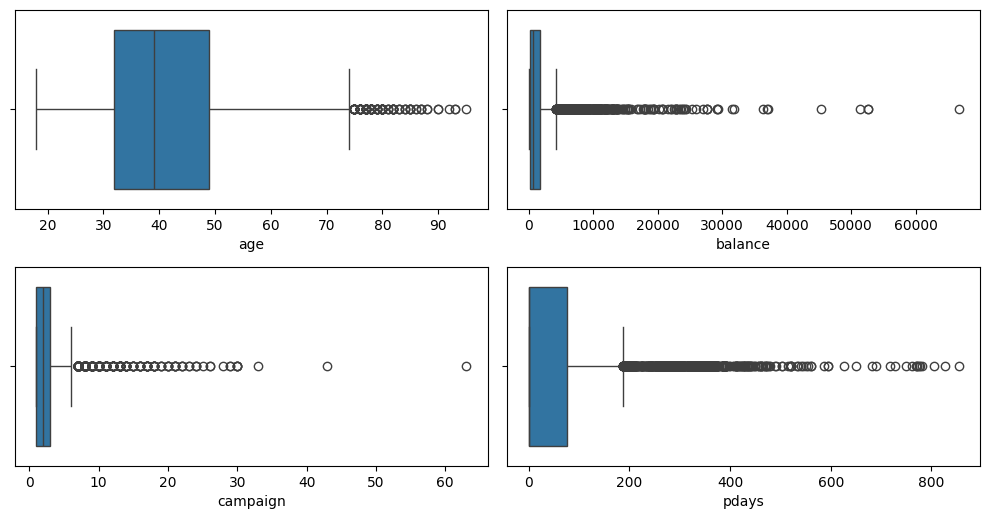

In [ ]:
numerik = data_with_outlier.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = data_with_outlier[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

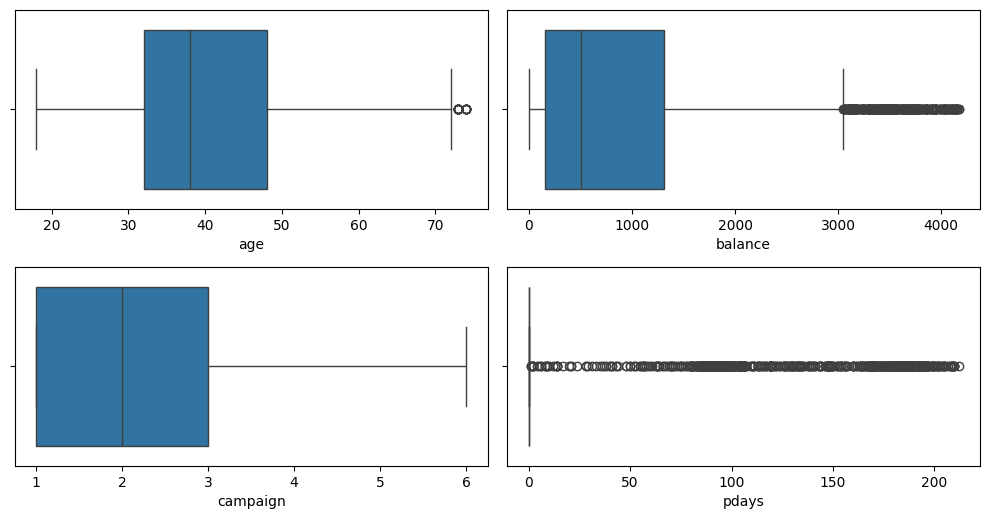

In [ ]:
numerik = data_without_outlier.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = data_without_outlier[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [ ]:
X_no_outliers = data_without_outlier.drop(columns = 'deposit')
y_no_outliers = data_without_outlier['deposit']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers,
    y_no_outliers,
    test_size = 0.2,
    random_state = 42,
    stratify = y_no_outliers
)

In [ ]:
X_train_no_outliers.shape, X_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((4496, 10), (1124, 10), (4496,), (1124,))

In [ ]:
# Konversi variabel target menjadi numerik
y_train_no_outliers = y_train_no_outliers.map({'yes': 1, 'no': 0})
y_test_no_outliers = y_test_no_outliers.map({'yes': 1, 'no': 0})

In [ ]:
from imblearn.pipeline import Pipeline


train_score_lis_no_outliers = []
train_score_std_list_no_outliers = []
test_score_list_no_outliers = []
for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])
    # Train model
    score = cross_val_score(model, X_train_no_outliers, y_train_no_outliers, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
    # menghitung mean f1 score setiap split
    train_score_lis_no_outliers.append(score.mean())
    # menghitung standar deviasi
    train_score_std_list_no_outliers.append(score.std())

    # Prediksi
    model.fit(X_train_no_outliers, y_train_no_outliers)
    ypred_test_no_outliers = model.predict(X_test_no_outliers)

    # Evaluasi
    test_score = recall_score(y_test_no_outliers, ypred_test_no_outliers)
    test_score_list_no_outliers.append(test_score)


In [ ]:
df2 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'matrics score' : 'Recall',
    'train_score_mean': train_score_lis_no_outliers,
    'train_score_std': train_score_std_list_no_outliers,
    'test_score': test_score_list_no_outliers}).sort_values(by = 'test_score', ascending = False)
df2.style.highlight_max(subset=['train_score_mean', 'test_score'], color='red', axis=0)

,model,matrics score,train_score_mean,train_score_std,test_score
4,VC Soft,Recall,0.616445,0.008917,0.623162
6,Random Forest,Recall,0.620121,0.017371,0.615809
5,Stacking,Recall,0.600378,0.016301,0.595588
1,Decision Tree,Recall,0.615530,0.005642,0.591912
2,KNN,Recall,0.592080,0.020131,0.588235
8,XGBoost,Recall,0.606332,0.011336,0.586397
3,VC Hard,Recall,0.600370,0.005214,0.584559
0,Logistic Regression,Recall,0.581556,0.023114,0.571691
7,Gradient Boosting,Recall,0.583832,0.015237,0.555147


###Uji Matrics Lainnya

In [ ]:
# Daftar model yang akan digunakan
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('VC Hard', VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], voting='hard')),
    ('VC Soft', VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], voting='soft')),
    ('Stacking', StackingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ], final_estimator=LogisticRegression())),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(random_state=0))
]

In [ ]:
# List untuk menyimpan hasil evaluasi
results_no_outliers = []

In [ ]:
# Loop untuk melatih dan mengevaluasi setiap model
for model_name, model in models:
    # Buat pipeline yang menggabungkan transformer dan model
    pipeline = Pipeline([
        ('transformer', transformer),  # Terapkan transformer
        ('model', model)  # Terapkan model
    ])

    # Latih model menggunakan data training
    pipeline.fit(X_train_no_outliers, y_train_no_outliers)

    # Prediksi pada data test
    y_pred = pipeline.predict(X_test_no_outliers)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test_no_outliers, ypred_test_no_outliers)
    precision = precision_score(y_test_no_outliers, ypred_test_no_outliers)
    recall = recall_score(y_test_no_outliers, ypred_test_no_outliers)
    f1 = f1_score(y_test_no_outliers, ypred_test_no_outliers)

    # Cek apakah model mendukung predict_proba untuk ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_prob_no_outliers = pipeline.predict_proba(X_test_no_outliers)[:, 1]  # Ambil probabilitas kelas positif
        roc_auc = roc_auc_score(y_test_no_outliers, y_prob_no_outliers)
    else:
        roc_auc = "N/A"  # Jika model tidak mendukung predict_proba

    # Simpan hasil evaluasi
    results_no_outliers.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

In [ ]:
results_no_outliers = pd.DataFrame(results_no_outliers)
results_no_outliers.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], color='red', axis=0)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.660142,0.670168,0.586397,0.625490,0.719251
1,Decision Tree,0.660142,0.670168,0.586397,0.625490,0.589059
2,KNN,0.660142,0.670168,0.586397,0.625490,0.693018
3,VC Hard,0.660142,0.670168,0.586397,0.625490,N/A
4,VC Soft,0.660142,0.670168,0.586397,0.625490,0.692073
5,Stacking,0.660142,0.670168,0.586397,0.625490,0.725149
6,Random Forest,0.660142,0.670168,0.586397,0.625490,0.721016
7,Gradient Boosting,0.660142,0.670168,0.586397,0.625490,0.723876
8,XGBoost,0.660142,0.670168,0.586397,0.625490,0.712877


## Experiment 3: Resampling for Balencing

Disini kita **`TIDAK MELAKUKAN`** resampling dikarenakan data target yaitu `'deposito'` sudah `balence` sehingga tidak perlu dilakukannya resampling

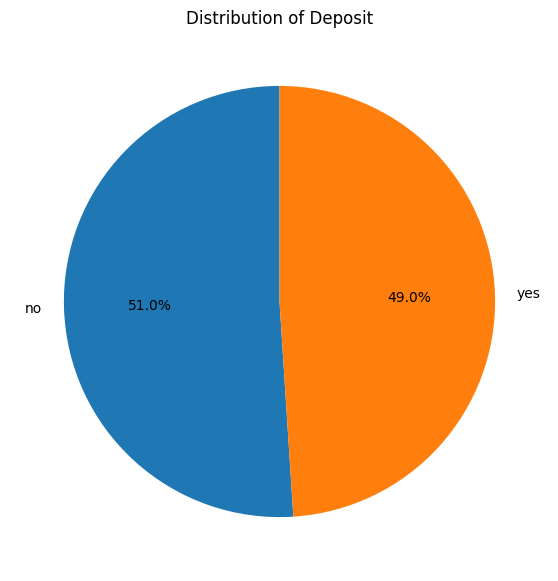

In [ ]:
#Menggunakan piechart
plt.figure(figsize=(7, 7))
plt.pie(data_with_outlier['deposit'].value_counts(), labels=data_with_outlier['deposit'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Deposit')
plt.show()

## Experiment 4: Base Model with Feature Selection

In [ ]:
# Model-model yang mendukung `coef_` atau `feature_importances_`
rfe_supported_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(random_state=0))
]

In [ ]:
from sklearn.feature_selection import RFE
results_RFE = []

train_score_list_rfe = []
train_score_std_list_rfe = []
test_score_list_rfe = []

In [ ]:
# Loop over models
for model_name, model in rfe_supported_models:

    # Gunakan RFE dengan model yang sedang diiterasi
    rfe = RFE(estimator=model, n_features_to_select=5)  # Hanya memilih 5 fitur terbaik

    # Create a pipeline with a transformer and the model
    pipeline = Pipeline([
        ('transformer', transformer),  # Transformer diterapkan pada X_train
        ('feature_selection', rfe),  # RFE untuk seleksi fitur
        ('model', model)
    ])

    # Perform cross-validation on the training set
    score = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall')

    # Store the mean and std of cross-validation f1 scores
    train_score_list_rfe.append(score.mean())
    train_score_std_list_rfe.append(score.std())

    # Prediksi
    pipeline.fit(X_train, y_train)
    ypred_test = pipeline.predict(X_test)

    # Evaluasi
    test_score = recall_score(y_test, ypred_test)
    test_score_list_rfe.append(test_score)

In [ ]:
df3 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'matrics score' : 'Recall',
    'train_score_mean': train_score_list_rfe,
    'train_score_std': train_score_std_list_rfe,
    'test_score': test_score_list_rfe}).sort_values(by = 'test_score', ascending = False)
df3.style.highlight_max(subset=['train_score_mean', 'test_score'], color='red', axis=0)

,model,matrics score,train_score_mean,train_score_std,test_score
2,Random Forest,Recall,0.572370,0.018397,0.580780
1,Decision Tree,Recall,0.557766,0.021964,0.572423
3,Gradient Boosting,Recall,0.541394,0.018722,0.547354
4,XGBoost,Recall,0.512848,0.070598,0.474930
0,Logistic Regression,Recall,0.454412,0.015794,0.472145


###Uji Matrics Lainnya

In [ ]:
# List untuk menyimpan hasil evaluasi
results_matrics_rfe = []

In [ ]:
# Loop untuk melatih dan mengevaluasi setiap model
for model_name, model in rfe_supported_models:

    # Gunakan RFE dengan model yang sedang diiterasi
    rfe = RFE(estimator=model, n_features_to_select=5)  # Hanya memilih 5 fitur terbaik

    # Buat pipeline yang menggabungkan transformer dan model
    pipeline = Pipeline([
        ('transformer', transformer),  # Terapkan transformer
        ('feature_selection', rfe),  # RFE untuk seleksi fitur
        ('model', model)  # Terapkan model
    ])

    # Latih model menggunakan data training
    pipeline.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = pipeline.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cek apakah model mendukung predict_proba untuk ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas positif
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"  # Jika model tidak mendukung predict_proba

    # Simpan hasil evaluasi
    results_matrics_rfe.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

In [ ]:
results_matrics_rfe = pd.DataFrame(results_matrics_rfe)
results_matrics_rfe.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], color='red', axis=0)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.678937,0.786543,0.472145,0.590078,0.719358
1,Decision Tree,0.589639,0.582153,0.572423,0.577247,0.584660
2,Random Forest,0.614860,0.612335,0.580780,0.596140,0.662222
3,Gradient Boosting,0.676892,0.725092,0.547354,0.623810,0.721182
4,XGBoost,0.665985,0.751101,0.474930,0.581911,0.709077


##Hasil

In [ ]:
df0['eksperimen'] = 'Rule Based'
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Without Outliers'
df3['eksperimen'] = 'Based Model with Feature Selection'

# penggabungan semua df score
df_gab = pd.concat([df0, df1, df2, df3], axis = 0)
df_gab = df_gab.set_index(['eksperimen','model'])

# highlight ke score terbaik
df_gab.style.highlight_max(subset = ['train_score_mean','test_score'],color = 'red', axis = 0).highlight_min(subset = ['train_score_std'],color = 'red', axis = 0)



<ipython-input-306-09b1cf0ec213>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_gab = pd.concat([df0, df1, df2, df3], axis = 0)


# Final Model

Dari hasil experiment yang kita lakukan dapat kita ketahui bahwa model yang paling bagus dalam melakukan analisis adalah model ***`VC Soft`*** denga experiment ***`based model`***, selanjutnya kita menggunakan model tersebut untuk melakukan analisis pada tahap selanjutnya

In [ ]:
best_model = Pipeline([
    ('transformer', transformer),
    ('model', vc_soft)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('scaler', RobustScaler(),
                                                  Index(['age', 'balance', 'campaign', 'pdays'], dtype='object'))])),
                ('model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=1000)),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=0)),
                                              ('knn', KNeighborsClassifier())],
                                  voting='soft'))])

- `transformer`: Melakukan preprocessing data.
- `model`: Melakukan klasifikasi menggunakan V*oting Classifier (soft voting)*

***Transformasi Data dengan transformer***

Pada tahap ini, transformer menggunakan ColumnTransformer yang menggabungkan beberapa teknik preprocessing untuk mempersiapkan data sebelum model dijalankan:

- `OneHotEncoder`: Menerapkan one-hot encoding pada kolom kategori (misalnya, housing, loan, contact, dan poutcome) untuk mengubah kategori menjadi kolom biner (0 atau 1).

- `BinaryEncoder`: Menerapkan binary encoding pada kolom kategori yang memiliki banyak nilai unik seperti job dan month. Binary encoding mengubah kategori menjadi representasi biner.
- `RobustScaler`: Melakukan normalisasi data numerik (seperti saldo atau jumlah kontak dalam kampanye) untuk memastikan bahwa skala fitur seragam. Ini dilakukan untuk mengurangi dampak outliers pada model.
- `remainder='passthrough`': Kolom-kolom yang tidak mengalami transformasi akan dilewatkan tanpa perubahan.

***Soft Voting pada VotingClassifier***

Model dalam pipeline adalah Voting Classifier (soft voting), yang menggabungkan beberapa model berbeda:

- ***Logistic Regression***: Model regresi logistik yang digunakan untuk prediksi probabilitas berdasarkan hubungan linier antara fitur dan target.
- ***Decision Tree***: Membagi data menjadi beberapa subset berdasarkan fitur paling informatif untuk membuat prediksi.
- ***K-Nearest Neighbors (KNN)***: Menggunakan jarak terdekat antara sampel dalam ruang fitur untuk menentukan kelasnya.

Soft Voting bekerja dengan cara menghitung rata-rata probabilitas dari masing-masing model, dan menggunakan probabilitas rata-rata untuk menentukan prediksi akhir. Ini berbeda dengan hard voting, yang menggunakan suara mayoritas tanpa mempertimbangkan probabilitas.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Recall: {recall_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       749
           1       0.66      0.63      0.64       718

    accuracy                           0.66      1467
   macro avg       0.66      0.66      0.66      1467
weighted avg       0.66      0.66      0.66      1467

Recall: 0.6295264623955432


##Hypertuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk setiap model dalam Voting Classifier
param_grid = {
    'model__lr__C': [0.1, 1.0, 10],  # Logistic Regression regularization parameter
    'model__dt__max_depth': [None, 10, 20],  # Decision Tree depth
    'model__knn__n_neighbors': [3, 5, 7]  # KNN number of neighbors
}

`param_grid` mendefinisikan kombinasi parameter yang akan diuji pada setiap model dalam Voting Classifier:

- '`model__lr__C`': Ini adalah parameter regularisasi untuk Logistic Regression. Nilai C mengontrol kekuatan regularisasi; nilai yang lebih kecil berarti regularisasi yang lebih kuat.
- '`model__dt__max_depth`': Ini adalah parameter maximum depth untuk Decision Tree. Kedalaman maksimum menentukan seberapa dalam pohon keputusan bisa tumbuh. Semakin dalam pohon, semakin kompleks modelnya.
- '`model__knn__n_neighbors`': Ini adalah parameter jumlah tetangga yang digunakan dalam K-Nearest Neighbors. Nilai ini menentukan berapa banyak tetangga terdekat yang akan dipertimbangkan untuk memprediksi kelas.

In [ ]:
# Lakukan Grid Search pada pipeline yang sudah dibuat
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='recall')

# Latih Grid Search dengan data training
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['job',
                                                                          'month']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['age', 'balance', 'campaign', 'pdays'], dtype='object'))])),
                                       ('model',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression(max_iter=1000)),
                                                                     ('dt',
                                                                      DecisionTreeClassifier(random_state=0)),
                                                                     ('knn',
                                                                      KNeighborsClassifier())],
                                                         voting='soft'))]),
             param_grid={'model__dt__max_depth': [None, 10, 20],
                         'model__knn__n_neighbors': [3, 5, 7],
                         'model__lr__C': [0.1, 1.0, 10]},
             scoring='recall')

***Proses Grid Search***
- Grid Search akan mencoba setiap kombinasi parameter dalam param_grid. Untuk setiap kombinasi, Grid Search melakukan pelatihan model dan menggunakan cross-validation (cv=5) untuk mengevaluasi kinerja model berdasarkan skor recall.
- Cross-validation berarti dataset akan dibagi menjadi 5 bagian (folds). Model akan dilatih pada 4 bagian dan diuji pada 1 bagian, dan ini diulang hingga setiap bagian telah digunakan sebagai data uji.

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__dt__max_depth,param_model__knn__n_neighbors,param_model__lr__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.149822,0.025219,0.110243,0.032292,None,5,0.1,"{'model__dt__max_depth': None, 'model__knn__n_...",0.586087,0.605217,0.615652,0.591304,0.618467,0.603346,0.012857,1
8,0.126795,0.005179,0.084940,0.000853,None,7,10.0,"{'model__dt__max_depth': None, 'model__knn__n_...",0.584348,0.603478,0.619130,0.593043,0.616725,0.603345,0.013381,2
6,0.166828,0.034484,0.118598,0.035013,None,7,0.1,"{'model__dt__max_depth': None, 'model__knn__n_...",0.584348,0.603478,0.615652,0.593043,0.618467,0.602998,0.013012,3
7,0.127043,0.007751,0.085250,0.000567,None,7,1.0,"{'model__dt__max_depth': None, 'model__knn__n_...",0.584348,0.603478,0.617391,0.593043,0.616725,0.602997,0.012983,4
5,0.200682,0.019595,0.154645,0.013751,None,5,10.0,"{'model__dt__max_depth': None, 'model__knn__n_...",0.586087,0.603478,0.613913,0.589565,0.618467,0.602302,0.012827,5


In [ ]:
# Output hasil terbaik
print(f"Best parameters: {grid_search.best_params_}\n\n")
print(f"Best recall score: {grid_search.best_score_}")

Best parameters: {'model__dt__max_depth': None, 'model__knn__n_neighbors': 5, 'model__lr__C': 0.1}


Best recall score: 0.6033455537039842


In [ ]:
# Gunakan model terbaik yang ditemukan oleh Grid Search
best_vc_soft_model = grid_search.best_estimator_

# Evaluasi pada data test
y_pred_best_tuning = best_vc_soft_model.predict(X_test)
print(classification_report(y_test, y_pred_best_tuning))
print(f'Recall: {recall_score(y_test, y_pred_best_tuning)}')

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       749
           1       0.65      0.63      0.64       718

    accuracy                           0.66      1467
   macro avg       0.66      0.66      0.66      1467
weighted avg       0.66      0.66      0.66      1467

Recall: 0.628133704735376


In [ ]:
#Perbandingan recall final model dengan tuning dan tanpa tuning
pd.DataFrame({
    'Model': ['Final Model Tanpa tuning', 'Final Model Dengan tuning'],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_best_tuning)]
})

,Model,Recall
0,Final Model Tanpa tuning,0.629526
1,Final Model Dengan tuning,0.628134


ternyata untuk final model yang dipilih hasilnya `lebih tinggi tanpa dilakukannya hypertuning`. Dapat dilihat untuk nilai recall :
- ***Final Model Tanpa tuning:*** `0.6295264623955432`
- ***Final Model Dengan tuning:*** `0.628133704735376`

## Feature Importances

In [ ]:
# Pastikan best_model adalah VotingClassifier
vc_model = best_model.named_steps['model']  # Ambil VotingClassifier dari pipeline

In [ ]:
# Buat list kosong untuk menyimpan feature importance dari setiap model individu
feature_importances_all = []

In [ ]:
# Loop untuk mendapatkan feature importance dari model-model yang mendukungnya
for model in vc_model.estimators_:
    # Cek apakah model memiliki feature_importances_ (seperti Random Forest, Decision Tree)
    if hasattr(model, 'feature_importances_'):
        feature_importances_all.append(model.feature_importances_)
    # Jika model memiliki koefisien (seperti Logistic Regression)
    elif hasattr(model, 'coef_'):
        feature_importances_all.append(model.coef_[0])

In [ ]:
import numpy as np

In [ ]:
# Jika VotingClassifier berisi model yang mendukung feature importance
# if len(feature_importances_all) > 0:
# Rata-rata atau agregasi feature importance dari setiap model
feat_imp = np.mean(feature_importances_all, axis=0)

# Mendapatkan nama-nama fitur setelah preprocessing
features = best_model.named_steps['transformer'].get_feature_names_out()

# Membuat DataFrame dengan feature importance
df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by='importance', ascending=False)

# Tampilkan hasil
df_feat_imp

,features,importance
4,one hot__poutcome_success,1.213614
12,binary__month_3,0.386881
10,binary__month_1,0.330058
9,binary__month_0,0.245054
11,binary__month_2,0.233664
3,one hot__poutcome_failure,0.207434
14,scaler__balance,0.188161
5,binary__job_0,0.113953
13,scaler__age,0.088113
16,scaler__pdays,0.030610


<Axes: xlabel='importance', ylabel='features'>

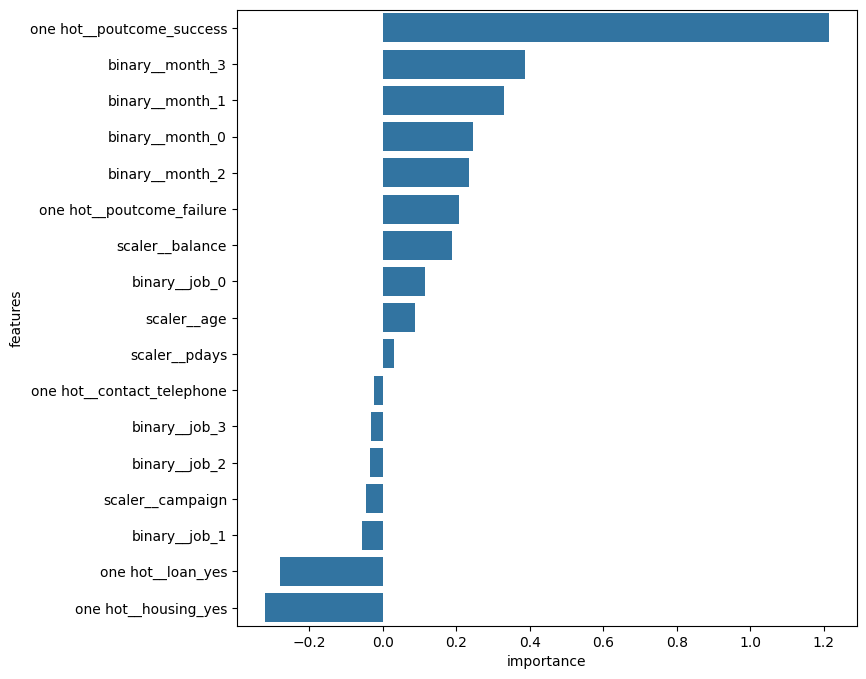

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

***Fitur Paling Penting:***

- `one_hot__poutcome_success` memiliki pengaruh terbesar dalam model. Ini berarti, jika nasabah memiliki hasil sukses dari kampanye sebelumnya (fitur `poutcome` dengan nilai "success"), mereka lebih mungkin untuk melakukan deposito.

***Fitur Lain yang Penting:***

- Fitur `binary__month_3`, `binary__month_1`, `binary__month_0`, `binary__month_2` menunjukkan bahwa bulan (yang direpresentasikan oleh encoding) juga memiliki pengaruh signifikan dalam prediksi model. Ini berarti, waktu atau bulan kontak dengan nasabah adalah faktor penting dalam menentukan apakah mereka akan melakukan deposito.
- `scaler__balance` menunjukkan bahwa saldo nasabah juga menjadi fitur penting, yang mungkin menunjukkan bahwa nasabah dengan saldo lebih tinggi memiliki kecenderungan lebih besar untuk melakukan deposito.
- `one_hot__poutcome_failure` juga menunjukkan bahwa kegagalan dalam kampanye sebelumnya (fitur `poutcome` dengan nilai "failure") memberikan dampak, meskipun lebih kecil daripada kesuksesan.

***Fitur dengan Pengaruh Kecil atau Negatif:***

- Beberapa fitur, seperti `one_hot__housing_yes`, `one_hot__loan_yes`, `scaler__campaign`, memiliki pengaruh yang kecil atau bahkan negatif. Ini menunjukkan bahwa fitur-fitur ini memiliki sedikit pengaruh dalam memprediksi apakah nasabah akan melakukan deposito atau tidak.
- Fitur `scaler__campaign` menunjukkan bahwa jumlah kampanye (berdasarkan scaling) mungkin tidak terlalu relevan dalam model ini, atau bahkan berdampak negatif.

***Kesimpulan***

***Poutcome (Outcome dari Kampanye Sebelumnya):***

- Seperti terlihat pada `one_hot__poutcome_success` dan `one_hot__poutcome_failure`, hasil kampanye sebelumnya merupakan faktor penting dalam menentukan apakah nasabah akan melakukan deposito pada kampanye yang sedang berlangsung. Hasil sukses memiliki pengaruh terbesar, diikuti oleh hasil gagal.

***Bulan Kontak (Month):***

- Bulan-bulan tertentu (seperti `binary__month_3` hingga `binary__month_0`) terlihat memiliki pengaruh besar terhadap hasil prediksi. Ini konsisten dengan data kit sebelumnya bahwa bulan kontak terakhir sangat memengaruhi keputusan nasabah untuk melakukan deposito.

***Saldo Nasabah (Balance):***

- `scaler__balance` menunjukkan bahwa saldo nasabah sangat penting dalam prediksi model. Ini berarti nasabah dengan saldo yang lebih tinggi mungkin lebih cenderung untuk melakukan deposito, sesuai dengan ekspektasi.

***Fitur yang Kurang Penting:***

- Fitur seperti `housing` dan loan memiliki pengaruh yang sangat kecil atau bahkan negatif. Ini mungkin menunjukkan bahwa status kepemilikan rumah atau pinjaman nasabah tidak terlalu menentukan keputusan mereka untuk melakukan deposito.

#Estimasi Keuntungan

In [ ]:
from sklearn.metrics import confusion_matrix

<Axes: >

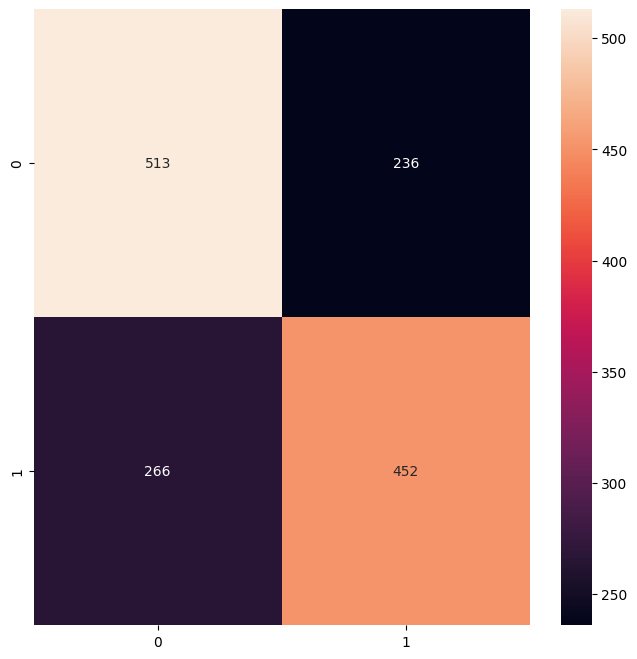

In [ ]:
confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt='d')

- True Positives (TP) - 452 nasabah yang diprediksi akan melakukan deposito dan benar-benar melakukannya.

  - Keuntungan: Bank berhasil menargetkan nasabah yang tepat. Ini berarti alokasi sumber daya untuk kampanye pemasaran berhasil mendorong keputusan nasabah untuk melakukan deposito, yang dapat meningkatkan pendapatan dari bunga deposito.

- True Negatives (TN) - 513 nasabah diprediksi tidak akan melakukan deposito dan mereka benar-benar tidak melakukannya.

  - Keuntungan: Bank dapat menghindari mengalokasikan sumber daya untuk menargetkan nasabah yang tidak tertarik pada deposito, sehingga menghemat biaya pemasaran yang sia-sia.

- False Positives (FP) - 236 nasabah yang diprediksi akan melakukan deposito, tetapi ternyata tidak melakukannya.

  - Kerugian: Ini berarti bank menghabiskan sumber daya untuk kampanye pemasaran pada nasabah yang diprediksi akan melakukan deposito, tetapi ternyata tidak. Ini merupakan kerugian dari sisi biaya pemasaran yang tidak efektif, karena tidak menghasilkan konversi.

- False Negatives (FN) - 266 nasabah yang diprediksi tidak akan melakukan deposito, tetapi ternyata sebenarnya mereka bersedia.

  - Kerugian: Bank kehilangan peluang untuk mendapatkan pendapatan dari nasabah yang bersedia melakukan deposito, tetapi tidak ditargetkan secara efektif oleh kampanye pemasaran. Ini dapat dianggap sebagai kehilangan potensi pendapatan dari bunga deposito yang mungkin cukup besar.

##***Interpretasi Keuntungan dan Kerugian***

***Keuntungan dari True Positives (TP):***

- Nasabah yang tertarik (452 orang): Bank mendapatkan 452 nasabah yang benar-benar melakukan deposito. Potensi pendapatan dari bunga deposito nasabah ini adalah keuntungan langsung.
- Contoh perhitungan: Jika satu nasabah yang melakukan deposito menghasilkan keuntungan rata-rata 200 dolar dari bunga deposito, maka keuntungan dari True Positives adalah: `452×200=90,400dolar`.

***Kerugian dari False Positives (FP):***

- Nasabah yang tidak tertarik (236 orang): Model memprediksi nasabah akan melakukan deposito, tetapi nasabah tersebut tidak melakukannya, yang berarti bank mungkin telah mengeluarkan biaya pemasaran yang sia-sia.
- Contoh perhitungan: Jika biaya untuk menghubungi satu nasabah adalah 10 dolar, maka kerugian dari False Positives adalah: `236×10=2,360(dolar)`
- Ini adalah kerugian dari biaya pemasaran yang sia-sia.

***Kerugian dari False Negatives (FN):***

- Nasabah yang terlewatkan (266 orang): Model memprediksi nasabah tidak akan melakukan deposito, tetapi sebenarnya mereka bersedia. Bank kehilangan kesempatan untuk mendapatkan pendapatan dari nasabah-nasabah ini.
- Contoh perhitungan: Jika satu nasabah yang melakukan deposito menghasilkan keuntungan rata-rata 200 dolar dari bunga deposito, maka potensi pendapatan yang hilang dari False Negatives adalah:`266×200=53,200dolar.`
- Ini adalah pendapatan yang hilang karena nasabah yang terlewatkan oleh model.


***Keuntungan dari True Negatives (TN):***

- Nasabah yang benar-benar tidak tertarik (513 orang): Bank tidak mengeluarkan biaya untuk menargetkan nasabah yang memang tidak akan melakukan deposito, sehingga menghemat biaya pemasaran untuk 513 nasabah ini.
- Contoh perhitungan: Jika biaya untuk menghubungi satu nasabah adalah 10 dolar, maka biaya yang dihemat dari True Negatives adalah:`513×10=5,130dolar.`

***Kesimpulan:***
- True Positives (452 nasabah): Memberikan pendapatan sebesar 90,400 dolar kepada bank.
- False Positives (236 nasabah): Menghasilkan kerugian dari biaya pemasaran sebesar 2,360 dolar.
- False Negatives (266 nasabah): Mengakibatkan potensi pendapatan hilang sebesar 53,200 dolar.
- True Negatives (513 nasabah): Menghemat biaya pemasaran sebesar 5,130 dolar.

Dari hasil ini, dapat disimpulkan bahwa fokus utama untuk meningkatkan keuntungan bank adalah mengurangi jumlah False Negatives (FN), karena di situlah pendapatan terbesar yang hilang. Dengan memperbaiki model agar lebih baik dalam mengidentifikasi nasabah yang bersedia melakukan deposito (yaitu mengurangi FN), bank dapat meningkatkan potensi pendapatan.